In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from collections import Counter
import math
import datetime as dt
import time

### **EDA**

In [ ]:
# 통계 표기
print(titanic.info())
print(titanic.describe(include=['float64','int64']))

# 컬럼 변경
titanic = titanic.drop(['PassengerId', 'Cabin'], axis=1)
titanic[col] = titanic[col].astype('category')
freq = freq.rename(columns={'count':'도수'}) # 컬럼명 변경

# 도수분포표 
result1 = pd.cut(titanic['Age'], bins=5)  # 계급수 지정
result2 = pd.cut(titanic['Age'], bins=[0, 20, 40, 60, float('inf')], right=False)

freq1 = pd.DataFrame(result1.value_counts()).reset_index()
freq1 = freq1.rename(columns={'Age':'계급', 'count':'도수'}).sort_values(by='계급')

# 도수분포표 - 상대도수 추가 (2가지 방법)
freq1['상대도수'] = freq1['도수'].apply(lambda x: x / freq1['도수'].sum())
freq['상대도수'] = titanic['Survived'].value_counts(normalize=True) 

# 도수 및 막대 그래프
fig, ax = plt.subplots(1,2, figsize=(10, 5)) 
freq['도수'].plot.bar(ax=ax[0], color=['yellow', 'purple']) 
ax[1].pie(freq['도수'].values, labels=freq['도수'].index, 
          autopct="%.2f%%", colors=['yellow', 'purple'])

# 히스토그램 (상대도수)
ax[0].hist(titanic['Age']) # 기본 히스토그램
ax[1].hist(titanic['Age'], bins=4) #bin number 설정
ax[2].hist(titanic['Age'], bins=[i for i in range(0,90,10)]) # bin edges 설정

# 히스토그램 (상대도수)
plt.hist(titanic['Age'],bins=5, weights=np.ones_like(titanic['Age']) / len(titanic['Age']))

# Box plot
titanic[['Age']].boxplot(vert=False, medianprops={'color':'red'})
# vert=False는 수평, True는 수직 상자그림, medianprops의 color는 중위수 색상

# Scatter plot
ax[0].scatter(titanic['Age'], titanic['Fare'])
ax[1].scatter(Xs, Ys)

In [ ]:
from scipy.stats.mstats import gmean, hmean, tmean

example = [1, 2, 3, 4, 5, 10]
print("산술평균: {:.2f}".format(np.mean(example)))
print("기하평균: {:.2f}".format(gmean(example)))
print("조화평균: {:.2f}".format(hmean(example)))
print("절사평균: {:.2f}".format(tmean(example, (1,5)))) # 1이상, 5이하 제외

print("중위수: ", titanic['Fare'].median())
print("최빈값: ", titanic['Fare'].mode()[0])
print("1사분위수: ", titanic['Fare'].quantile(q=0.25))
print("75백분위수: ", np.percentile(titanic['Fare'], 75)) 

print("범위: %.2f" %(titanic['Fare'].max() - titanic['Fare'].min()))
iqr = titanic['Fare'].quantile(0.75) - titanic['Fare'].quantile(0.25)
print("사분위범위: %.2f" %(iqr), "\n")

md = np.mean(np.abs(np.array(titanic['Fare']) - np.mean(titanic['Fare'])))
print("평균편차: %.2f" %(md))
print("사분편차: %.2f" %(iqr/2), "\n")

print("모분산: %.2f" %(titanic['Fare'].var(ddof=0)))
print("표본분산: %.2f" %(titanic['Fare'].var(ddof=1))) # 자유도 n-1을 의미 

print("모표준편차: %.2f" %(titanic['Fare'].std(ddof=0)))
print("표본표준편차: %.2f" %(titanic['Fare'].std(ddof=1)))

print("사분위편차계수: %.2f" %(iqr/2/titanic['Fare'].median()))
print("평균편차계수: %.2f" %(md/titanic['Fare'].mean()))
print("모집단 변동계수: %.2f" %(titanic['Fare'].std(ddof=0)/titanic['Fare'].mean()))
print("표본집단 변동계수: %.2f" %(titanic['Fare'].std(ddof=1)/titanic['Fare'].mean()))

print("왜도: %.3f, 첨도: %.3f" %(titanic['Fare'].skew(), titanic['Fare'].kurt()))

from scipy.stats import pearsonr
corr, p = pearsonr(titanic['Age'], titanic['Fare'])
print("피어슨 상관계수 {:.3f}, p-value {:.3f}".format(corr, p))

from scipy.stats import spearmanr
corr, p = spearmanr (titanic['Survived'],titanic['Pclass'])
print("스피어만 상관계수는 {:.3f}, p-value는 {:.3f}".format(corr, p))

!pip install stemgraphic 
import stemgraphic
stemgraphic.stem_graphic (titanic['Age'])

### **Preporcessing**

#### 1. 결측치 처리

In [ ]:
# 결측치 개수 카운트
print("**원본 데이터:\n", wine.isna().sum())

# 결측치 시각화
import missingno as msno
msno.matrix(df = wine, figsize=(5,5), fontsize=12, ax=ax[0], sparkline=False)

In [ ]:
# 결측치 대체 (0, 평균, 중간값 등)
wine_imp = wine_m.fillna(0)
wine_tmp['Alcohol'] = wine_tmp['Alcohol'].fillna(wine_tmp['Alcohol'].mean())
wine_tmp['Ash'] = wine_tmp['Ash'].fillna(wine_tmp['Ash'].median()) 

# 최빈값 (편하게, 평균/중간값도 사용 가능)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
   # strategy = 'mean', 'median' or 'most_frequent'
wine_imp1 = imputer.fit_transform(wine_m)

# HotDeck (wine 데이터에서 랜덤하게 데이터를 선택하여 wine_m의 결측치를 대체)
wine_imp2 = wine_m.copy()
for feat in ['Alcohol', 'Ash']:
    missing_idx = wine_imp2[wine_imp2[feat].isna()==True].index
    wine_imp2.loc[missing_idx, feat] = wine[feat].sample(len(missing_idx)).values

# KNNImputer
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3)
wine_imp3 = imputer.fit_transform(wine_m)

# 선형보간법
wine_imp4 = wine_m.interpolate(method='linear')
wine_imp4.isna().sum()

#### 2. 이상치 처리

In [ ]:
# 이상치 찾기
IQR = wine['Malicacid'].quantile(0.75) - wine['Malicacid'].quantile(0.25)
top = wine['Malicacid'].quantile(0.75) + IQR * 1.5
down = wine['Malicacid'].quantile(0.25) - IQR * 1.5

#상한선보다 크고, 하한선보다 작은 데이터의 인덱스를 찾음
out_id = wine[(wine['Malicacid']>=top) | (wine['Malicacid']<=down)].index
print("이상치의 index", out_id)

In [ ]:
# 절단
prep_df = wine[['Malicacid']].drop(out_id,axis=0)

# 조정: 상한/하한값으로 조정
prep_df2 = wine[['Malicacid']].clip(down,top)

# 클리핑 : 특정값으로 조정
prep_df3 = wine[['Malicacid']].clip(1, 5)

#### 3. 클래스 불균형 처리

In [14]:
# 랜덤오버샘플링: 기존에 존재하는 소수의 클래스를 단순 복제하여 클래스가 불균형 하지 않도록 비율을 맞춰주는 방법이다. 
# 분포의 변화는 없으나 소수 클래스의 숫자가 늘어나기 때문에 더 많은 가중치를 받게 되어 유효하다고 본다. 
# 예측변수가 질적변수이거나 결측치가 있어도 전처리가 필요없다. 반면, 과적합의 위험이 있다.
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=0)
x_sample, y_sample = os.fit_resample(x, y)

# SMOTE (Synthetic Minority Oversampling TEchnique)
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0, k_neighbors=3)

from imblearn.over_sampling import BorderlineSMOTE
os = BorderlineSMOTE(random_state=0, k_neighbors=3)

from imblearn.over_sampling import KMeansSMOTE
os = KMeansSMOTE(random_state=0, k_neighbors=3)

# SVM SMOTE: support vector 데이터들 중에서 소수 클래스 데이터들을 경계 데이터로 삼아 SMOTE 적용
  # 장점: support vector로서 유효한 소수 클래스 데이터들이 오버샘플링
  # 단점: 데이터를 학습해서 생성해야 하기 때문에 시간 소요, 예측변수 모두 수치형, 결측값 없어야 함
from imblearn.over_sampling import SVMSMOTE 
os = SVMSMOTE(random_state=0, k_neighbors=3)

# ADASYN (Adaptive Synthetic Sampling)
from imblearn.over_sampling import ADASYN
os = ADASYN(random_state=0, n_neighbors=3)

#### 4-1. 변수변환: 수치형

In [ ]:
############### 선형 변환 #######################

# 표준화 (Z-score): 평균, 분산 기준
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df3[['age', 'balance']] = ss.fit_transform (df3[['age', 'balance']])

# 최대최소 스케일링: 최소/최대를 0과 1 기준 (이상치 영향 많음)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm_X = mm.fit_transform(X)

# Robust Scaling : 중간값과 1,3사분위수 기준
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs_X = rs.fit_transform(X)

# Quantile Scaling: 사분위수 기준 + uniform or normal 분포
from sklearn.preprocessing import QuantileTransformer
qtu = QuantileTransformer(output_distribution = 'uniform', n_quantiles=len(X))
qtn = QuantileTransformer(output_distribution = 'normal', n_quantiles=len(X))
qtu_X = qtu.fit_transform(X)


In [ ]:
############### 비선형 변환 #######################

# 1. 로그변환
# 상용로그
y_log = np.log10(y)
y_log_inv = 10**(y_log)

# 자연로그
y_log2 = np.log(y) 
y_log2_inv = np.exp(y_log2) # 변환 전 값으로 되돌리기

# 데이터에 1을 더한(plus) 후 자연로그 (x=0 일때 무한대 방지)
y_log3 = np.log1p(y) 
y_log3_inv = np.expm1(y_log3) # 변환 전 값으로 되돌리기

# 데이터의 절대값에 자연로그 변환을 한 후, 데이터의 원래 부호 붙임
y_log4 = np.sign(y)*np.log(np.abs(y))
y_log4_inv = np.sign(y_log4)*np.exp(np.abs(y_log4))

# 2. 거듭제곱변환 (Box-cox, Yeo-Johnson): Box-cox는 양수만, Yeo-Johnson은 모든 실수
from sklearn.preprocessing import PowerTransformer
PTB = PowerTransformer(method='box-cox')
PTY = PowerTransformer(method='yeo-johnson')
y_ptb = DataFrame(PTB.fit_transform(y), columns=y.columns)
y_pty = DataFrame(PTY.fit_transform(y), columns=y.columns)

In [ ]:
############### 기타 변환 #######################

# 순위변환
rank_X = X.rank(ascending=False)  # ascending=False시 가장 낮은 수치가 가장 높은 rank

# 구간분할 (binning) : cut
import pandas as pd
binned = pd.cut(X['bath'], 4) 

# 구간분할 (binning) : KBinsDiscretizer
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=3, strategy='quantile')
kbinned = kb.fit_transform(np.array(X['bath']).reshape(-1,1)) #reshape필요
result = DataFrame(kbinned.toarray(), columns=bin_edges)

#### 4-2. 변수변환: 범주형

In [ ]:
# 원핫코딩 --> 명목척도 / 독립변수에 사용 / 여러 컬럼 동시 인코딩 가능
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
result = DataFrame(ohe.fit_transform(x[['col']]).toarray(), columns = ohe.categories_)

# label_binarize: 원핫코딩과 유사 / 종속변수에 사용 / 
from sklearn.preprocessing import label_binarize
y_test2 = label_binarize(y_test, classes=np.unique(y_test))

# 더미코딩: 원핫코딩 with 변수 n-1개 (다중공선성 방지) --> 명목척도
from pandas import get_dummies
df3 = get_dummies(df3, columns=['marital', 'job', 'contact', 'month'])
x = get_dummies(x[['col']], drop_first=True, dtype='int') # dtype 디폴트는 bool

# 숫자로 표현된 범주형 특성 변환 (category로 type 변환)
x['col'] = x['col'].astype('category')

# 레이블인코딩 (replace or map 사용 / labelencoder 사용) --> 이진변수, 서열척도
x['col'] = x['col'].replace({'A':0, 'B':1, 'C':2, 'D':3})
x['col'] = x['col'].map({'A':0, 'B':1, 'C':2, 'D':3})

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
case2 = le.fit_transform(realestate['size'])

# 특성해싱 (특성 갯수를 줄일 수 있으나.. 너무 복잡...)
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher (n_features=5, input_type='string')
raw_X = realestate['size'].apply(lambda x: [x]).tolist() 
hash_df = fh.transform (raw_X)
hash_df = pd.DataFrame(hash_df.todense(), columns = [f"feature_{i}" for i in range(5)])

# 빈도 인코딩: 학습/검증 데이터에 동일한 기준으로 인코딩
fe = realestate[['availability', 'society', 'total_sqft']]
for col in ['availability', 'society', 'total_sqft']:
    fe = fe.apply(lambda col: col.map(col.value_counts()))

In [ ]:
# (!!!)단순한 레이블 인코딩 코드
for col in [i for i in df.columns if df[i].dtypes==object]:
    DICT = dict(zip(df[col].unique(), range(df[col].nunique())))
    df[col] = df[col].map(DICT)

### **Sampling (표본추출, 데이터 분할, 교차검증)**

#### 3-1. 표본추출

In [ ]:
# 단순랜덤추출법
iris.sample(n=3, replace=False, axis=1, frac=0.3)
random.sample(data_list,4)  # 비복원추출
np.random.choice(data_list,4)  # 복원추출, choices 사용시 복수개 생성

# 계통추출법
data, n = iris, 8
N = len(data)
K = N//n  #구간 내 샘플 수
index = data.loc[:K].sample(1).index  #첫 구간에서 임의로 선택한 샘플 인덱스
sys_df = DataFrame()
while len(sys_df) < n:
    sys_df = pd.concat ([sys_df, data.loc[index,:]])
    index += K

# 집락추출법: 군집별로 랜덤추출법 수행 / 지역 & 다단계표본추출 / 층화추출법에서 층을 집락으로 대체

# 층화추출법(1) - 비례추출
data, stratum, sampling_no = iris, 'target', 9

levels = data[stratum].unique()
total = data[stratum].value_counts().sum()
prop_val = data[stratum].value_counts()/total
no = prop_val * sampling_no
result = DataFrame()
for level in levels:
    temp_df = data[data[stratum]==level].sample(int(no[level]))
    result = concat([result, temp_df])

# 층화추출법(2) - 불비례추출
# 데이터, 층/집락 정보를 가진 컬럼명, 추출표본 개수, 각 층/집락의 비율
data, stratum, sampling_no, proportion = iris, 'target', 10, {0:0.2, 1:0.5, 2:0.3}

levels = list(proportion.keys())
prop_val = np.array(list(proportion.values()))
no = prop_val * sampling_no
result = DataFrame()
for level in levels:
    temp_df = data[data[stratum]==level].sample(int(no[level]))
    result = concat([result, temp_df])

#### 3-2. 데이터 분할

In [ ]:
# 데이터 분할 기본
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 일반적 분할 (Train:Test = 7:3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5) # 홀드아웃 (5:5)

# Shuffle Split: n회 무작위 분할
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=4)
for i, (train_index, test_index) in enumerate(ss.split(X)):
    X_train, X_test, y_train, y_test = X.iloc[train_index, :], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

# K-fold 분할: [K-1개 집단을 Train, 나머지 1개 집단을 Test] X K번 / 앞에서부터 순서대로 Test 집단으로 선정 
# Shuffle하지 않는다면 데이터 정렬 순서에 따라 불균형 분포
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=False)   # n_splits=fold 개수, shuffle=데이터 분할 전 shuffle 여부
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test, y_train, y_test = X.iloc[train_index, :], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

# Stratified K-fold 분할
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):   # 분할 시 y를 고려해야 하기 때문에 split에 y를 입력!
    X_train, X_test, y_train, y_test = X.iloc[train_index, :], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

# Group K-fold 분할
# 범주형 범수인 Group을 각 분할마다 검증용 데이터로 사용하는 K-fold 진행방식 (ex. G1 그룹 데이터들을 1번째 Test set으로 활용)
from sklearn.model_selection import GroupKFold
group = iris2.filter(['group'])
gkf = GroupKFold(n_splits=4)
for i, (train_index, test_index) in enumerate(gkf.split(X, y, group)):   # 분할 시 group을 고려해야 하기 때문에 split에 group를 입력!
    X_train, X_test, y_train, y_test = X.iloc[train_index, :], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

#### 3-3. 교차검증

In [ ]:
# 분할 샘플로 교차 검증
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
LOGREG = LogisticRegression(max_iter = 300, C = 0.1) # 학습 모델 정의
SKF = StratifiedKFold(n_splits=4) # 데이터 분할 방법 정의
result = cross_validate(LOGREG, X, y, cv = SKF, return_train_score=True) #교차 검증

# 파라미터 후보들로 교차 검증
from sklearn.model_selection import GridSearchCV
LOGREG = LogisticRegression(max_iter = 300) # 학습 모델 정의
param_grid={'C':[0.01, 0.1, 1], 'solver':['lbfgs', 'liblinear']} #파라미터 후보 정의
SKF = StratifiedKFold(n_splits=4) # 데이터 분할 방법 정의
grid = GridSearchCV(LOGREG, param_grid, cv = SKF) #교차 검증
grid.fit(X, y)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수: {}".format(grid.best_params_))
print(DataFrame(grid.cv_results_))

### **Probability**

#### 1. 이산형 확률분포

In [ ]:
# E:기대값  V:분산  p:성공확률  x:확률변수  N:표본수  n:시행횟수 or 샘플수  k:성공횟수

# 베르누이
from scipy.stats import bernoulli
E, V = bernoulli.stats(p)

# 이항분포 : 성공 확률 p인 베르누이를 독립적으로 n번 시행했을 때 성공횟수를 확률변수로 하는 분포
  # 예시: 근로자가 내년에 회사를 떠날 확률이 0.1이라고 추정한 경우, 근로자 3명을 무작위로 뽑은 상황
from scipy.stats import binom
E, V = binom.stats(n,p)  # n = 3, p = 0.1
binom.pmf(x, n, p)  # 확률질량함수: 1명이 금년에 회사를 떠날 확률은?  x = 1
binom.cdf(x, n, p)  # 누적확률질량함수: 1명 이하로 떠날 확률은? x = 1

# 음이항분포 : 성공 확률이 p인 베르누이를 독립적으로 반복 시행하여 k번 성공할 때까지의 시행횟수 or 실패횟수를 확률변수로 하는 분포
  # 예시: A가 승리할 확률이 0.3일 때, 5번 경기를 치르는 상황
from scipy.stats import nbinom
n = 5  # 총 시행회수
k = 2  # 총 성공 횟수
p = 0.3 # 성공 확률
x = n-k # 확률변수 X가 k번 성공할 때까지의 실패횟수 x인 경우
E, V = nbinom.stats(k, p)
pmf, cdf = nbinom.pmf(x, k, p), nbinom.cdf(x, k, p)

# 기하분포 : 성공 확률이 p인 베르누이를 독립적으로 반복 시행하여 1번 성공할 때까지의 시행횟수 or 실패횟수를 확률변수로 하는 분포
         #   이산확률분포에서 유일하게 무기억성의 성질 (과거 실패가 앞으로 영향을 미치지 않음)
  # 예시: 하나의 주사위를 세번 던질 때 세번째 시행에서 앞면 숫자가 6이 나올 확률은?
from scipy.stats import geom
n = 3 # 총 시행횟수
p = 1/6 # 성공확률
x = n # 확률변수 X가 처음으로 성공할 때까지의 시행횟수 x인 경우
E, V = geom.stats(p, moments = 'mv')  # moments = 'mv' 없어도 같은 결과
pmf, cdf = geom.pmf(x, p), geom.cdf(x, p)

# 초기하분포 : 크기 N의 유한모집단 중 크기 n의 확률표본을 뽑을 경우, N개 중 k개는 성공 / N-k개는 실패로 분류하여 
             # 비복원으로 뽑을 때 성공횟수를 확률변수로 하는 분포
  # 예시: 상자 속에 빨간 공이 90개 파란 공이 10개 들어 있다. 임의로 1개씩 두 번 꺼내고 다시 넣지 않을 때 1개가 파란 공이 될 확률은?
from scipy.stats import hypergeom
N = 100 #모집단 수 (총 공 개수)
k = 10 #성공요소 수 (총 파란공 개수)
n = 2 #시행횟수 (공 선택 횟수)
x = 1 #확인하고자 하는 사건 (1개 파란공) **확률변수
E, V = hypergeom.stats(N, k, n)
pmf, cdf = hypergeom.pmf(x, N, k, n), hypergeom.cdf(x, N, k, n)

# 포아송 분포: 단위시간/면적/공간 내에서 발생하는 어떤 사건의 횟수를 확률변수 X라고 할 때, 
            # 확률변수 X는 lambda (사건의 평균값)을 모수로 갖는 포아송 분포를 따름
  # 예시: 주말 저녁 시간 당 평균 6명이 응급실 올 경우, 어떤 주말 저녁 30분 내 4명이 도착할 확률은?
from scipy.stats import poisson
x = 4 #구간 내 사건 횟수
lam = 3 #구간 내 평균 (=lambda)
E, V = poisson.stats(lam, moments='mv')
pmf, cdf = poisson.pmf(x, lam), poisson.cdf(x, lam)

#### 2. 연속형 확률분포

In [ ]:
# 균일분포 
  #예시: 버스가 오전 7시부터 15분 간격 정류장 출발. 7시에서 7시 30분 사이 도착시간이 균등분포를 따르면 버스를 5분 미만 기다릴 확률은?
a, b = 0, 30
range_ = [(10, 15), (25, 30)]
p = 1/(b-a) #확률밀도함수
cdf = 0
for (x1, x2) in range_:
    cdf += (x2-x1) * p #누적분포함수

# 정규분포 / 표준정규분포: 정규분포의 왜도는 0, 첨도는 3 / 양측꼬리는 x축에 닿지 않고 무한대로 확장
  # 예시: 확률변수 X가 정규분포 N(30, 64)를 따를 때 26 ~ 46 구간의 확률은?
from scipy.stats import norm #표준정규분포
import numpy as np
E, V = 30, 64
S = np.sqrt(V) # 표준편차
x1, x2 = 26, 46
cdf = norm.cdf((x2-E)/S) - norm.cdf((x1-E)/S) # 표준화

# 정규분포에서 ppf 계산 (상위 10%의 X값 계산)
from scipy.stats import norm
E, S = 65, 12
norm.ppf(1-0.1,E,S)

# 지수분포: 어떤 사건이 포아송 분포에 의해서 발생될 때, 지정된 시점으로부터 이 사건이 일어날 때가지 걸린 시간을 측정하는 확률분포로
         # 확률변수 X는 한 번의 사건이 발생할 때까지 소요되는 시간 (lambda는 단위시간 동안 평균적으로 발생하는 사건 횟수 in 포아송)
  # 예시: 자동차들 사이 시간 간격이 평균 3분인 지수확률 분포를 따르는 경우, 연속한 두대의 차량이 도착하는 시간이 2분 이내일 확률은?
from scipy.stats import expon
lam = 1/3  # lambda = 3분동안 1건, 1분동안 1/3건
x = 2 # 사건이 일어날 때까지 걸린 시간
E, V = 1/lam, 1/(lam**2)
cdf = expon.cdf(x, scale = 1/lam) # scale에 1/lam을 입력해주어야 함

# 감마분포 : 지수분포의 일반화된 형태로, alpha번의 사건이 발생할 때까지의 대기시간 분포
  # 예시: 어부가 물고기를 30분에 한 마리씩 잡는다. 4마리의 물고기를 잡을 때까지 1~3시간 걸릴 확률은?
from scipy.stats import gamma
lam = 2 # lambda: 30분에 한마리 = 1시간에 두마리 잡음
alpha, beta = 4, 1/lam
E = alpha * beta
V = alpha * beta**2
# scale에 beta를 입력해주어야 함
cdf = gamma.cdf(3, alpha, scale=beta) - gamma.cdf(1, alpha, scale=beta)

# 카이제곱
#  : 1) 모집단이 정규분포일 떄 표본에서 모분산 추정/검정   2) 비모수 검정 중 범주형 변수들에 대한 적합도/독립성/동질성 검정

# t분포
#  : 모분산을 모르는 상황에서 표본 평균 추정/검정시 사용
#  : t분포는 자유도가 증가할수록 표준정규분포에 수렴 / 주로 30개 이하의 소표본에 사용

# F분포
#  : 1) 두 모집단의 모분산 비의 추정/검정   2) 세집단 이상의 모평균 비교

### **모수 vs. 비모수 검정 판단**

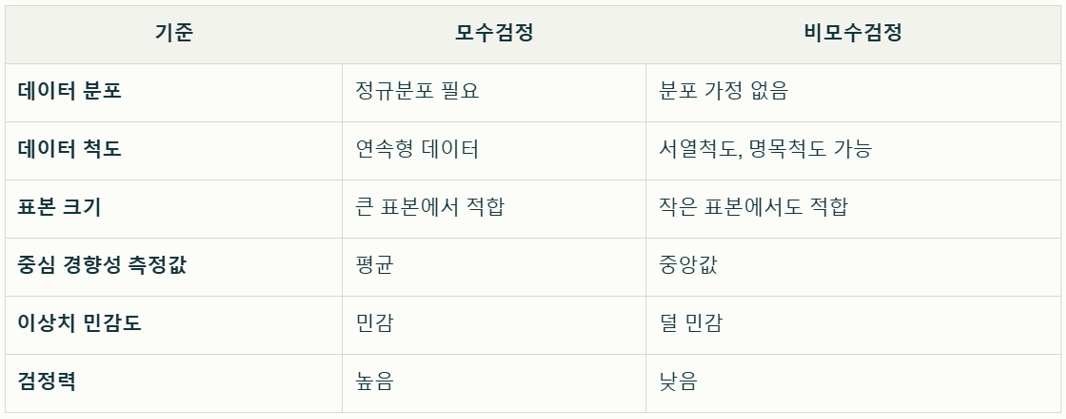

### **Estimation (모수검정) - one or two-sample**

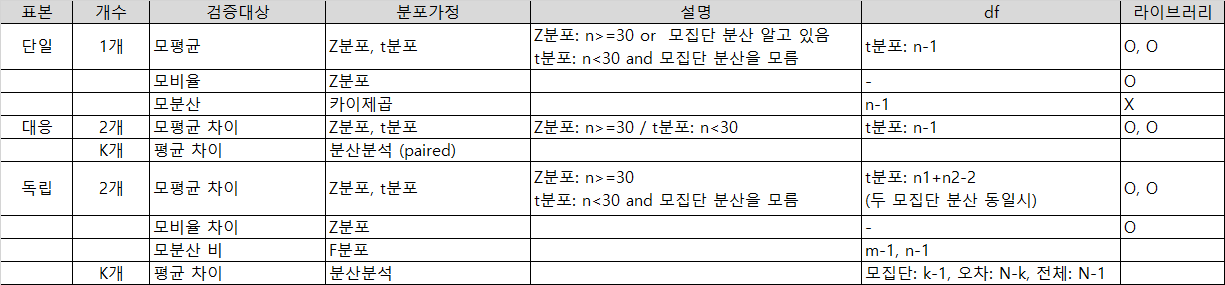

mu:모평균 / X: 표본평균 / sigma: 모표준편차 / S:표본표준편차  
n: 표본크기 / df: 자유도 / P:모비율 / p: 표본 비율  
  
conf_a or test_a: 유의수준 (0.05 when 95% 신뢰수준) > sp: 유의확률 --> 귀무가설 기각    
 * conf_a or test_a --> (ppf 메소드) --> conf_z/t/F: 신뢰계수 계산 (점추정시 사용)  
 * conf_a or test_a --> (ppf 메소드) --> CV: 임계값 계산 (가설검정시 사용)  

cv: 임계값 <-> z/t/Fstat: 검정통계량 --> 검정통계량이 기각역에 있으면 귀무가설 기각  
 * z/t/Fstat: 검정통계량 --> (cdf 메소드) --> sp: 유의확률 계산

우측검정 H1: mu > mu0 --> sp = 1-t.cdf(tstat,df) / cv = t.ppf(1-test_a, df)  
좌측검정 H1: mu < mu0 --> sp = t.cdf(tstat,df) / cv = t.ppf(test_a, df)

#### 1. **Z분포**: 단일 모평균 & 모비율 / 독립 & 대응 모평균 차이 / 독립 모비율 차이

In [ ]:
############ scipy로 계산 #################
# 1. 점추정 (예시: one-sample 모평균 검정)
from scipy.stats import norm
SE = sigma / np.sqrt(n)  # 표준오차(standard error) --> 검증에 따라 다름!
conf_z = norm.ppf(1-conf_a/2)  # 신뢰계수(confidence coefficient)
ME = conf_z * SE  # 오차의 한계 = 허용오차(ME: margin of error)

print(" 점 추정량: {:.3f}".format(x))  # 검증에 따라 다름!
print(" 구간 추정량: {:.3f}~{:.3f}".format(x-ME, x+ME))
print(" 오차의 한계: {:.3f}".format(ME))

# 2. 가설검정 (예시: one-sample 모평균 검정)
zstat = (x - mu0)/SE #검정통계량 --> 검증에 따라 다름!

#단측(one)/양측(two)검정에 따른 유의확률과 임계값
ways = 'two' #'two', 'one-right(mu > mu0)', 'one-left(mu < mu0)' 
if ways == 'two': 
    sp = (1-norm.cdf(np.abs(zstat)))*2 # 유의확률(significance probability)
    cv = norm.ppf(1-test_a/2) # 임계값 (critical value)
    cv = "+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-norm.cdf(zstat)
    cv = norm.ppf(1-test_a)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)

print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, zstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

In [ ]:
############ 라이브러리 활용 #################
from statsmodels.stats.weightstats import ztest
import statsmodels.api as sm
stat, pval = ztest(data, value=pop_mean)  # 1. one-sample 모평균 
stat, pval = sm.stats.proportions_ztest(count, nobs, value=hypothesized) # 2. one-sample 모비율
stat, pval = ztest(cityA, cityB)  # 3. 독립표본 모평균 차이 

# 4. 독립표본 모비율 차이 
count = np.array([300, 400])  # 각 그룹의 성공 횟수
nobs = np.array([500, 500])  # 각 그룹의 총 관측치
stat, pval = sm.stats.proportions_ztest(count, nobs, alternative='two-sided')

# 5. 대응표본 모평균 차이 (one-sample Z-test로 차이를 검정)
difference = after - before  # 두 표본 간의 차이 계산
stat, pval = ztest(difference, value=0)

print("Z-statistic:", stat, "P-value:", pval)

#### 2. **t분포**: 단일 모평균 / 독립 & 대응 모평균 차이

In [ ]:
############ scipy로 계산 #################
# 1. 점추정 (예시: one-sample 모평균 검정)
from scipy.stats import t
SE = s / np.sqrt(n)  # 검증에 따라 다름!
conf_t = t.ppf(1-conf_a/2, df)  # df = n-1
ME = conf_t * SE 

print(" 점 추정량: {:.3f}".format(x))  # 검증에 따라 다름!
print(" 구간 추정량: {:.3f}~{:.3f}".format(x-ME, x+ME))
print(" 오차의 한계: {:.3f}".format(ME))

# 2. 가설검정 (예시: one-sample 모평균 검정)
tstat = (x - mu0)/SE   # 검증에 따라 다름!

#단측(one)/양측(two)검정에 따른 유의확률과 임계값
ways = 'one-right' #'two', 'one-right(mu>mu0)', 'one-left(mu<mu0)'
if ways == 'two': 
    sp = (1-t.cdf(np.abs(tstat), df))*2
    cv = t.ppf(1-test_a/2, df)
    cv = "+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-t.cdf(tstat, df)
    cv = t.ppf(1-test_a, df)
elif ways == 'one-left':
    sp = t.cdf(tstat, df)
    cv = t.ppf(test_a, df)

print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, tstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

In [ ]:
############ 라이브러리 활용 #################
# 1. 단일표본 모평균 검증 
from scipy.stats import ttest_1samp
t_stat, p_value = ttest_1samp(data, popmean)
print("T-statistic:", t_stat, "P-value:", p_value)

# 2. 독립표본 모평균 차이
from scipy.stats import ttest_ind  
X1 = [1,3,5,7,9]
X2 = [9,11,13,15]

# equal_var: 모집단의 분산이 동일한지 여부
# alternative: 대립가설의 형태 'two-sided', 'less', 'greater'
tstat, p = ttest_ind(X1, X2, equal_var = True, alternative='two-sided') 
print(" 검정통계량: {:.3f}, 유의확률: {:.3f}\n".format(tstat, p))

tstat, p = ttest_ind(X1, X2, equal_var = False, alternative='two-sided')
print(" 검정통계량: {:.3f}, 유의확률: {:.3f}".format(tstat, p))

# 3. 대응표본 모평균 차이
from scipy.stats import ttest_rel
before = np.array([75, 83, 96, 77, 81, 90, 82, 67, 94, 85, 78, 82, 96, 80, 87, 81])
after = np.array([80, 90, 92, 75, 86, 90, 81, 70, 89, 88, 82, 79, 91, 90, 78, 89])
tstat, p = ttest_rel(before, after, alternative='two-sided')
print(" 검정통계량: {:.3f}, 유의확률: {:.3f}".format(tstat, p))


#### 3. **카이제곱분포**: 단일 모분산

In [ ]:
############ scipy로 계산 (별도 라이브러리 없음) #################
# 1. 점추정 (예시: one-sample 모분산 검정)
from scipy.stats import chi2
conf_c1 = chi2.ppf(1-conf_a/2, df)  # df = n-1
conf_c2 = chi2.ppf(conf_a/2, df)
CR1 = df * v / conf_c1 #confidence range --> 검증에 따라 다름!
CR2 = df * v / conf_c2 #confidence range --> 검증에 따라 다름!

print(" 점 추정량: {:.3f}".format(v))
print(" 구간 추정량: {:.3f}~{:.3f}".format(CR1, CR2))

# 2. 가설검정 (예시: one-sample 모분산 검정)
cstat = df * v / v0 #카이제곱통계량 --> 검증에 따라 다름!

# 단측(one)/양측(two)검정에 따른 유의확률과 임계값
ways = 'one-left' #'two', 'one-right(sigma^2>v0)', 'one-left(sigma^2<v0)'
if ways == 'two':
    if chi2.cdf(cstat, df) < 0.5:
        sp = (chi2.cdf(cstat, df))*2
    else:
        sp = (1-chi2.cdf(cstat, df))*2
    cv1 = chi2.ppf(test_a/2, df)
    cv2 = chi2.ppf(1-test_a/2, df)
    cv = "{:.3f}와 {:.3f}".format(cv1, cv2)
elif ways == 'one-right':
    sp = 1-chi2.cdf(cstat, df)
    cv = chi2.ppf(1-test_a, df)
elif ways == 'one-left':
    sp = chi2.cdf(cstat, df)
    cv = chi2.ppf(test_a, df)

print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, cstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

#### 4. **F분포**: 독립 모분산 비
F-검정은 정규성 가정에 민감하므로, 비모수적 대안 추천

In [ ]:
############ scipy로 계산 (별도 라이브러리 없음) #################
# 1. 점추정 (예시: 독립표본 모분산 비)
import numpy as np
from scipy.stats import f
sample1 = [272, 255, 278, 282, 296, 312, 356, 296, 302, 312]
sample2 = [276, 280, 369, 285, 303, 317, 290, 250, 313, 307]
n1, n2 = len(sample1), len(sample2)
df1, df2 = n1-1, n2-1 
v1, v2 = np.std(sample1, ddof=1)**2, np.std(sample2, ddof=1)**2 # 표본분산
conf_a = 0.05
fstat = v1/v2
f1, f2 = f.ppf(conf_a/2, df2,df1), f.ppf(1-conf_a/2, df2,df1)
CR1, CR2 = f1 * fstat, f2 * fstat
print(" 점 추정량: {:.3f}".format(fstat))
print(" 구간 추정량: {:.3f}~{:.3f}".format(CR1, CR2))

# 2. 가설검정 (예시: 독립표본 모분산 비 검증)
v0 = 1
test_a = 0.05

ways = 'one-left' #'two', 'one-right(모분산1>모분산2)', 'one-left(모분산1<모분산2)' 
if ways == 'two':
    if f.cdf(fstat, df1, df2) < 0.5:
        sp = (f.cdf(fstat, df1, df2))*2
    else:
        sp = (1-f.cdf(fstat, df1, df2))*2
    cv1 = f.ppf(test_a/2, df1, df2)
    cv2 = f.ppf(1-test_a/2, df1, df2)
    cv = "{:.3f}와 {:.3f}".format(cv1, cv2)
elif ways == 'one-right':
    sp = 1-f.cdf(fstat, df1, df2)
    cv = f.ppf(1-test_a, df1, df2)
elif ways == 'one-left':
    sp = f.cdf(fstat, df1, df2)
    cv = f.ppf(test_a, df1, df2)

print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, fstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

### **Estimation (모수검정) - ANOVA with k-sample**

- 분산분석: 3개 이상 집단의 모평균 차이를 검정 / 3가지 가정 검정 필요
  1. 정규성: 각 표본 반응변수는 정규분포 --> Sharpiro(소규모), Anderson-Darling(대규모) 등
  2. 등분산성: 모든 집단 반응변수 분산이 동일 --> Bartlett(정규성O), Levene(정규성X)
  3. 독립성: 각 관찰 값은 독립적 --> 일반적으로 독립적으로 수집되었다고 보기에 진행X

#### 1-1. 가정 검정: 정규성

In [ ]:
from scipy.stats import shapiro, anderson, jarque_bera, kstest, zscore, probplot
# H0: 표본 모집단이 정규성을 만족한다, H1: 표본 모집단이 정규성을 만족하지 않는다.

#shapiro: n<50 추천
sstat, p = shapiro(data)
print('shapiro: {:.3f} (p {:.3f})'.format(sstat, p)) 

#darling anderson: n>50 추천 / 검정 통계량 < 임계값 시, 정규성 가정 만족
dstat, cv, sl = anderson(data, dist='norm')
print('anderson: {:.3f} (임계치 {:.3f}, 유의수준 {:.2f})'.format(dstat, cv[2], sl[2]*0.01))

#kstest(콜모고로프 스미르노프): 대규모
kstat, p = kstest(data, cdf = norm.cdf)
print('kstest_normal: {:.3f} (p {:.3f})'.format(kstat, p)) 

#jarque_bera: 검정통계량, p-value, 왜도(skew), 첨도(kurtosis)를 반환
jstat, p = jarque_bera(data)
print('jarque_bera: {:.3f} (p {:.3f})\n'.format(jstat, p)) 

# QQ plot: 데이터들이 대각선에 붙어 있을 수록 정규성을 만족하는 것으로 본다.
from matplotlib import pyplot as plt
zdata = zscore(data)
fig = plt.figure()
probplot(zdata, dist='norm', plot=plt)
plt.title('Q-Q plot')
plt.show()

# (osm, odr), (slope, intercept, r) = probplot(zdata, plot=ax[0])

#### 1-2. 가정 검정: 등분산성

In [ ]:
# H0: 모든 그룹들의 모분산은 동일하다, H1: 그룹들 중 적어도 한 그룹의 모분산이 동일하지 않다.
# Bartlett: 정규성 만족 시 활용
from scipy.stats import bartlett
bstat, p = bartlett(data1, data2, data3)
print(" stat {:.3f}, p-value {:.3f}".format(bstat, p))

# Levene: 정규성 없을 때 활용, 표본 수가 같든지 다르든지 상관 없음
from scipy.stats import levene
lstat, p = levene(data[0], data[1], data[2], center='mean')
print(" stat {:.3f}, p-value {:.3f}".format(lstat, p)) #귀무가설 기각 불가 --> 등분산성 만족

#### 2-1. 등/이분산 one-way ANOVA (종속/독립변수 1개)
순서: 정규성/등분산성/독립성 검증 --> 분산분석 --> 사후검정
- A. 정규성 O, 등분산성 O, 샘플사이즈 동일 O  
  : standard ANOVA / Tukey HSD, snk, Dumnett, Duncan 등  
- B. 정규성 O, 등분산성 O, 샘플사이즈 동일 X  
  : standard ANOVA / Bonferroni, sidak, Fisher's LSD, Dumnett, Tukey HSD 등
- C. 정규성 O, 등분산성 X   
  : Welch's ANOVA, Brown-Forsythe ANOVA / GamesHowell, Dumnett T3 등  

In [ ]:
# A-1. 등분산 one-way ANOVA (샘플 사이즈 동일)
from statsmodels.stats.oneway import anova_oneway
# 1) DataFrame에서 A열, B열에 종속/독립변수가 각각 들어가 있으면 바로 컬럼 활용
oa = anova_oneway(data=data['sepallength'], groups = data['target'], use_var='equal')
# 2) DataFrame의 열이 종속변수로 구분되어 있으면 melt 활용
oa = anova_oneway(data=data.melt()['value'], groups=data.melt()['variable'],
                  use_var = 'equal') 
# 'equal': standard ANOVA, 'unequal': Welch's ANOVA, 'bf': Brown-Forsythe ANOVA
print(" stat: {:.3f}, p-value: {:.3f}".format(oa.statistic, oa.pvalue))

# A-2. 등분산 one-way ANOVA 후 사후 검정
# Tukey HSD: 정규성 O, 등분산 O, 샘플 사이즈 동일 O
from statsmodels.sandbox.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind
org_data = data.melt()  # wide에서 long format으로 변환
mc = MultiComparison(data = org_data['value'], 
                     groups = org_data['variable']).tukeyhsd(alpha=0.05)
print(mc)  ## p-adj는 조정된 p-value. 유의수준 0.05보다 적은 경우 귀무가설 기각

import matplotlib.pyplot as plt
mc.plot_simultaneous() 
plt.show()

In [ ]:
# B-1. 등분산 one-way ANOVA (샘플 사이즈 동일 X)
from statsmodels.stats.oneway import anova_oneway
oa = anova_oneway(data=data_df.melt().dropna()['value'],  # melt 후 dropna로 NaN 제거 필요
                   groups=data_df.melt().dropna()['variable'],
                  use_var = 'equal')  
print(" stat: {:.3f}, p-value: {:.3f}".format(oa.statistic, oa.pvalue))

# B-2. 등분산 one-way ANOVA 후 사후 검정
# Bonferroni: 정규성 O, 등분산 O, 샘플 사이즈 동일 X
print("[라이브러리 검정]")
from statsmodels.sandbox.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind
org_data = data_df.melt().dropna()

mc = MultiComparison(data = org_data['value'], 
                     groups = org_data['variable']
                    ).allpairtest(testfunc = ttest_ind, method='bonf')
# method는 다중 검정에서 p-value를 조정하는 방식을 결정하며, 주요 옵션은 다음과 같습니다:
# 'bonf': 가장 보수적인 Bonferroni 방식.
# 'holm', 'sidak': 덜 보수적인 방식.
# 'fdr_bh', 'fdr_by': 거짓 발견율(FDR)을 제어하는 방식.

print(mc[0])

In [ ]:
# C-1-1. 이분산 one-way ANOVA (Welch's)
from statsmodels.stats.oneway import anova_oneway
welch = anova_oneway(data=data.melt()['value'], groups=data.melt()['variable'],
                  use_var = 'unequal')
print(" stat: {:.3f}, p: {:.3f}".format(welch.statistic, welch.pvalue))

# C-1-2. 이분산 one-way ANOVA (Brown-Forsythe)
bf = anova_oneway(data=data.melt()['value'], 
                   groups=data.melt()['variable'], use_var = 'bf')
print(" stat: {:.3f}, p: {:.3f}".format(bf.statistic, bf.pvalue))

# C-2. 이분산 one-way ANOVA 후 사후검정
# GamesHowell: 정규성 O, 등분산 X
from pingouin import pairwise_gameshowell
org_data = data.melt()
gw = pairwise_gameshowell(dv='value', between='variable', data=org_data)

#### 2-2. 등분산 two-way ANOVA (종속변수 1개 / 독립변수 2개, ~이분산 예시~)

H0: 변수 A에 따른 종속변수 값에는 차이가 없고,   
&nbsp;&nbsp;&nbsp; 변수 B에 따른 종속변수 값에도 차이가 없으며, A-B의 상호작용 효과가 없다  
    
**A. 모수인자-모수인자 (Fixed Factor)**
  1. 반복이 없는 이원배치 분산분석: '모수-모수인자' 조합별 데이터 수가 1개
  2. 반복이 있는 이원배치 분산분석: '모수-모수인자' 조합별 데이터 수가 2개 이상  
    - A,B 교호작용이 유의하면 주효과 검정 무의미하고 교호작용효과만 검정 ~(예시)~  
    - A,B 교호작용이 유의하지 않으면, 오차항에 풀링 후 주효과 검정  

**B. 모수인자-변량인자 (Random Factor)**
  1. 난괴법 or 확률화블럭계획법: '모수-변량인자' 조합별 데이터 수가 1개
  2. 반복이 있는 이원배치 혼합모형: '모수-변량인자' 조합별 데이터 수가 2개 이상  
    - A,B 교호작용이 유의할 때, 모수인자의 주효과 검정만 의미 ~(예시)~  
    - A,B 교호작용이 유의하지 않으면, 오차항에 풀링 후 모수인자의 주효과 검정 ~(라이브러리)~  

In [ ]:
# A-1. 모수-모수 & 반복이 없는 이원배치 분산분석 (반복이 없으므로 교호작용 효과 검출 불가)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols("Y~C(A)+C(B)", data = data).fit()
atable2 = anova_lm(model)
print(atable2)

# A-2-1. 모수-모수 & 반복이 있는 이원배치 분산분석 (교호 작용 확인)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols("Y~C(A)+C(B)+C(A):C(B)", data = data).fit()
atable3 = anova_lm(model)
print(atable3) #유의수준 0.05 기준으로 A와 B의 교호작용이 유의하지 않은 것으로 확인함

# A-2-2. 모수-모수 & 반복이 있는 이원배치 분산분석 (풀링 후 주효과 학인)
model = ols("Y~C(A)+C(B)", data = data).fit()
atable4 = anova_lm(model)
print(atable4) #풀링 후 주효과 확인
## 유의수준 0.05 기준으로 B는 주효과가 있는 것으로 확인함

In [ ]:
# B-1. 모수-변량 & 반복이 없는 이원배치 분산분석 (A-1과 동일)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols("Y~C(A)+C(B)", data = data).fit()
atable2 = anova_lm(model)
print(atable2)
## 모수인자 A는 주효과 검정 결과 유의하지 않고, 
## 변량인자 B는 주효과 검정 대신 모분산을 추정한다.

# B-2-1. 모수-변량 & 반복이 있는 이원배치 혼합모형 (교호 작용 확인)
# B-2-2. 모수-변량 & 반복이 있는 이원배치 혼합모형 (풀링 후 주효과 확인)
# 라이브러리로 구현 실패. scipy 직접 계산 예시는 있으나 패스

### **Estimation (비모수검정)**

- 모집단의 분포에 대한 가정을 하지 않고, 분포 형태의 동일 여부에 대한 검증
  * H0: 각 변수의 데이터 분포 차이가 없다  /  H1: 적어도 한 쌍은 분포 차이가 있다.
- 정규분포가 아닌 경우, 표본의 크기가 작은 경우, 서열 or 명목 척도인 경우에 사용

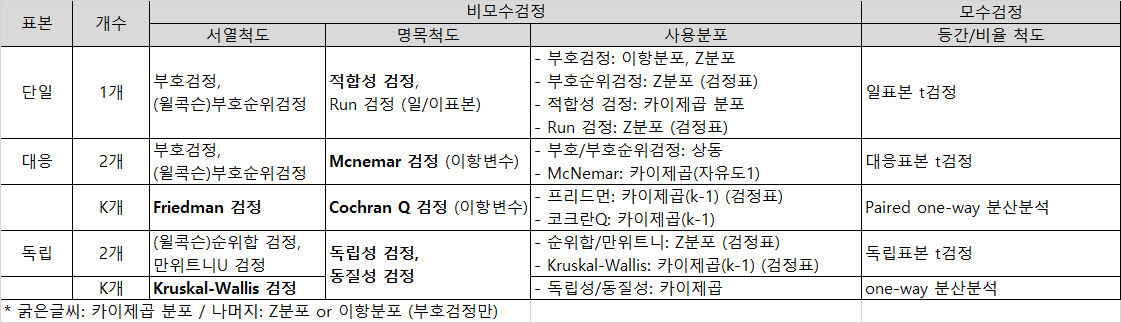

#### 1-1. 명목척도: 카이제곱 검정

In [ ]:
# A. 적합성 검정: 다항모집단 비율의 차이
# H0: 세 후보자의 지지도는 동일하다, H1: 지지도 차이가 0보다 크다. (우측 검정)
data = np.array([60, 50, 40])
m0 = data.mean() 
from scipy.stats import chisquare, chi2
stat, p = chisquare(data, m0)
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(stat, p))

#### B. 독립성 검정: 한 모집단 내 여러 수준의 차이 (여러 조건 존재)
# H0: 성별과 안경 착용여부는 서로 독립이다, H1: 독립이 아니다
table = DataFrame({"성별":['남자', '여자'], '안경O':[10,30], '안경X':[40, 20]}).set_index('성별')
chi2, p, df, expec = chi2_contingency(table, correction=False)

#### C. 동질성 검정: 여러 (부)모집단 간 여러 수준에 대한 차이
# H0: 프로그램에 대한 연령 별 선호에 차이가 없다.  H1: 적어도 한 집단은 차이가 있다.
table = DataFrame({"TV":['A', 'B', 'C'], '청년':[120, 30, 50], 
                   '중년':[10, 75, 15], '장년':[10,30,60]}).set_index('TV')
from scipy.stats import chi2_contingency
chi2, p, df, expec = chi2_contingency(table, correction=False)

#### 1-2. 명목척도: Run 검정

In [ ]:
# A. 일표본 Run 검정 (H0: 샘플이 무작위로 추출되었다)
# A-1. 범주형: 각 범주의 개수와 run의 개수를 검정에 사용
data = ['a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'b', 
        'a', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b']
data2 = list(map(lambda x: 0 if x == 'a' else 1, data))

from statsmodels.sandbox.stats.runs import runstest_1samp
zstat, pval = runstest_1samp(data2)  # data2 사용: 데이터를 숫자로 변환 필요

# A-2. 수치형: 데이터 중앙값을 기준으로 이진화한 후 검정 진행
data = [50, 60, 70, 40, 30, 20, 10, 70, 80, 100]
median = np.median(data)
data2 = []
for sample in data: #값을 중앙값을 기준으로 이진화 함
    if sample >= median:
        data2.append(1)
    else:
        data2.append(0)

from statsmodels.sandbox.stats.runs import runstest_1samp
zstat, pval = runstest_1samp(data2, cutoff='median')  # data2 사용

In [ ]:
# B. 이표본 Run 검정 (H0: 두 데이터는 동일한 분포에서 추출했다)
data1 = [23, 42, 36, 27, 48, 52, 35, 31]
data2 = [43, 56, 38, 20, 46, 51, 36]

# 라이브러리 검정을 위해 데이터 타입을 float으로 변환 필요
data1 = list(map(lambda x: float(x), data1))
data2 = list(map(lambda x: float(x), data2))

from statsmodels.sandbox.stats.runs import runstest_2samp
zstat, pval = runstest_2samp(data1, data2)

#### 1-3. 명목척도: 이항변수 (맥니머, 코크란)

In [ ]:
# A. 맥니머 검정: Paired, 2개 이항변수
table = DataFrame([[9, 12], [24, 35]], index=['전_있음', '전_없음'], columns=['후_있음', '후_없음'])
  # H0: 흥미가 없다가 있게 된 경우와 있다가 없게 된 경우의 분포가 동일하다 
  # 변화가 있는 b와 c에 주목하고 변화가 없는 대각선 값은 무시
b = table.values[0][1]
c = table.values[1][0]

from statsmodels.stats.contingency_tables import mcnemar
mc = mcnemar(table.values, exact=False, correction = False)
# 파라미터 exact 값이 True이면 이항분포, False이면 카이제곱분포를 사용한다.
# 분포 결정 기준은 2×2 분할표의 불일치 쌍(b+c, 비대각선 셀의 합)의 개수
  # 이항분포 : b+c < 25 / 카이제곱분포 : b+c ≥ 25 
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(mc.statistic, mc.pvalue))

In [ ]:
# B-1. 코크란 검정
# H0: 모든 연예인에 대한 호감도 비율이 차이가 없다 (모든 연예인의 호감도가 같다)
# H1: 적어도 한 쌍의 연예인은 호감도 비율이 차이가 있다 (적어도 한 쌍은 다르다)
table = DataFrame([[0,1,0,1,0,0,0,0], [1,1,0,1,0,0,1,1], [0,1,1,1,1,1,1,1]], 
                  index=['가수1', '가수2', '가수3'], columns=[1,2,3,4,5,6,7,8]).T 
#범주를 columns으로 해야 함

from statsmodels.stats.contingency_tables import cochrans_q
ccq = cochrans_q(table)
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(ccq.statistic, ccq.pvalue))

# B-2. 코크란 사후 검정: 맥니머
from itertools import combinations
col_comp= list(combinations(table.columns, 2)) # 컬럼들의 모든 pair 조합

from pandas import crosstab
from statsmodels.stats.contingency_tables import mcnemar
for s1, s2 in col_comp:
    ct = crosstab(table.loc[:, s1], table.loc[:, s2])
    mc = mcnemar(ct.values, exact=False, correction = False)
    stat, p = mc.statistic, mc.pvalue
    msg = "{}-{}: 검정통계량 {:.3f}, p-value {:.3f}".format(s1, s2, stat, p)
    if p < 0.05:
        print(msg + "***")
    else:
        print(msg)

#### 2-1. 서열척도: 부호, 순위 검정

In [ ]:
# A-1. 일표본 부호검정 (평균 아닌 **중앙값** 검정)
# n<=100: 이항분포 / n>100: 정규화한 부호검정 통계량은 정규분포

import numpy as np
from statsmodels.stats.descriptivestats import sign_test

data = np.array([203,204,197,195,201,205,198,199,194,207])
M0 = 200 
# H0: 데이터의 중앙값은 mu0와 같다.
# H1: 데이터의 중앙값은 mu0와 다르다.

test_stat, p = sign_test(data, mu0=M0)
print("부호검정 통계량: {:.3f}, p-value: {:.3f}".format(test_stat,p))

# A-2. 이표본 부호검정 
# n<=100: 이항분포 / n>100: 정규화한 부호검정 통계량은 정규분포
# H0: A와 B의 만족도는 차이가 없다, H1: A의 만족도가 더 높다

# 아래 라이브러리로 동일 구현 실패 
  # 이유1. sign_test 함수를 사용하여 우측 검정 직접 수행 불가 (양측검정만 가능)
  # 이유2. 텍스트북에서는 Z분포 활용, 라이브러리에서는 t분포 가정

from statsmodels.stats.descriptivestats import sign_test
data1 = np.array([4,3,5,2,1,3,4,3]) #A
data2 = np.array([3,2,3,1,2,2,2,2]) #B
differences = data1 - data2

test_statistic, p_value = sign_test(differences, mu0=0)

In [ ]:
# B-1. 일표본 윌콕슨 부호순위 검정 (평균 아닌 **중앙값** 검정)
# n<=20: 윌콕슨 순위합 분포 / n>20: 정규분포에 근사
# H0: 데이터의 중앙값은 200과 차이가 없다, H1: 데이터의 중앙값은 200과 차이가 있다
from scipy.stats import wilcoxon
data = np.array([203,204,197,195,201,205,198,199,194,207]) #데이터
M0 = 200 #중앙값
stat, p = wilcoxon([M0 for i in range(len(data))], data)

# B-2. 이표본 윌콕슨 부호순위 검정
# n<=20: 윌콕슨 순위합 분포 / n>20: 정규분포에 근사
# H0: 1번째 측정값과 2번째 측정값은 차이가 없다, H1: 차이가 있다
data1 = np.array([79, 96, 85, 69, 88, 75, 83, 88])
data2 = np.array([70, 88, 73, 74, 75, 79, 77, 81])

from scipy.stats import wilcoxon
stat, p = wilcoxon(data1, data2, zero_method='wilcox')

# B-3. 월콕슨 순위합 검정(만 위트니 U검정)
# n1+n2<=25: 윌콕슨 순위합 분포 / n1+n2>25: 정규분포에 근사
# H0: 성적 차이가 없다. 두 A, B 중앙값의 차이는 0이다
# H1: 성적 차이가 있다. 두 A, B 중앙값의 차이는 0이 아니다.
data1 = [87,75,65,95,90,81,93]
data2 = [57,85,90,83,87,71]

from scipy.stats import ranksums, mannwhitneyu
zstats, p = ranksums(data1, data2) #default: alternative='two-sided'
print(" 순위합 정규근사 검정통계량: {:.3f}, p-value: {:.3f}".format(zstats, p))
mstat, p = mannwhitneyu(data1, data2, alternative='two-sided')
print(" 만위트니 검정통계량: {:.3f}, p-value: {:.3f}".format(mstat, p))

#### 2-2. 서열척도: K표본 순위 데이터 검정

In [ ]:
# A-1. 프리드먼 검정 (K개 대응 표본)
# 검정표 사용 조건: 1) 3개 범주 and n<=9    2) 4개 범주 and n<=5
# 상기 조건 이외 n이 충분히 크면, 검정 통계량 Q가 카이제곱 분포에 근사

# 운전자 A, B, C, D의 운전 점수에 차이가 있는지 검정
# H0: 네 운전자의 운전 점수는 차이가 없다.
# H1: 적어도 한 쌍의 운전자의 운전 점수는 차이가 있다.
from scipy.stats import friedmanchisquare
table = DataFrame([[4,2,5], [3,5,2], [5,4,4], [1,1,3]], index=['A', 'B', 'C', 'D']) 
stat, p = friedmanchisquare(table.values[0], table.values[1], table.values[2], table.values[3])
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(stat, p))

# A-2. [사후 검정] 윌콕슨 부호순위 검정
from itertools import combinations
col_comp= list(combinations(table.index, 2))

from pandas import crosstab
from scipy.stats import wilcoxon
for s1, s2 in col_comp:
    stat, p = wilcoxon(table.loc[s1, :], table.loc[s2, :], zero_method='wilcox')
    msg = "{}-{}: 검정통계량 {:.3f}, p-value {:.3f}".format(s1, s2, stat, p)
    if p < 0.05:
        print(msg + "***")
    else:
        print(msg)

In [ ]:
# B-1. 크러스컬 월리스 검정 (K개 독립 표본)
# 검정표 사용 조건: 1) 3개 범주 and n<=15    2) 4개 범주 and n<=14
# 상기 조건 이외 n이 충분히 크면, 검정 통계량 H가 카이제곱 분포에 근사

# A, B, C 세 사람의 모의고사 성적을 통해 성취도의 차이가 있는지 검정
# H0: 세 사람의 성취도는 차이가 없다, H1: 적어도 한 쌍의 성취도는 차이가 있다.
table = DataFrame([[69,67,65,59,66], [56,63,55,40], [71,72,70,75]], 
                  index=['A','B','C'])

from scipy.stats import kruskal
stat, p = kruskal(table.values[0], table.values[1], table.values[2], nan_policy='omit')
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(stat, p))

# B-2. [사후 검정] 윌콕슨 순위합
from itertools import combinations
col_comp= list(combinations(table.index, 2))

from pandas import crosstab
from scipy.stats import ranksums
for s1, s2 in col_comp:
    stat, p = ranksums(table.loc[s1, :], table.loc[s2, :], nan_policy='omit')
    msg = "{}-{}: 검정통계량 {:.3f}, p-value {:.3f}".format(s1, s2, stat, p)
    if p < 0.05:
        print(msg + "***")
    else:
        print(msg)

### **Correlation (공분산과 상관계수)**

#### 1. 공분산
두 변수가 서로 독립이면 공분산은 0 (역은 성립하지 않음. 비선형 연관성 존재 가능)

In [ ]:
import pandas as pd
X = np.array([4,6,6,8,8,9,9,10,12,12])
Y = np.array([39,42,45,47,50,50,52,55,57,60])

cov3 = np.cov(X, Y) # numpy는 공분산 행렬을 반환해줌
print(pd.DataFrame(cov3, columns=['X', 'Y'], index=['X', 'Y']))
print(" X-Y의 공분산: {:.2f}".format(cov3[0][1]))

#### 2. 상관계수
- 공분산은 변수의 측정단위에 영향 --> 공분산을 각 변수의 표준편차로 나눈 상관계수 사용
- 피어슨 상관계수: 연속형(등간/비율), 정규분포 가정
- 스피어만 순위상관계수 / 켄달의 타우: 서열 척도 or 수치형 극단적 분포, 비모수적 (확률 분포 정보 X)
- 크라메르의 연관계수: 범주형, 카이제곱 독립성 크기 측정, 0~1: 0.2이하 / 0.6이상

**적용 기준 (AI 검색)**
1. 순위형 데이터 분석 시:  
   A. 대표본(n>=30) + 이상치 적음 → 스피어만  
   B. 소표본(n<30) + 동순위 많음 → 켄달의 타우  
3. 명목형 데이터 분석 시: 크라메르의 연관계수

In [ ]:
# 1) 기본 수식: corr = cov / (Sx*Sy) <-- 공분산을 X, Y의 표본표준편차들로 나눔

# 2) 피어슨 상관계수 (=표본상관계수)
from scipy.stats import pearsonr
corr3 = np.corrcoef(X,Y)[0][1]  # numpy는 상관계수 행렬로 반환
corr4, pval = pearsonr(X, Y) # 피어슨 상관계수와 유의확률을 반환해줌
print(" {:.2f}, {:.2f} (p-value: {:.2f})".format(corr3, corr4, pval))

# 3) 스피어만 순위상관계수
from scipy.stats import spearmanr
corr, p = spearmanr(X, Y)
print(" 상관계수 {:.3f}, p-value: {:.3f}".format(corr, p))

# 4) 켄달의 타우
from scipy.stats import kendalltau
corr, p = kendalltau(X, Y)
print(" 상관계수 {:.3f}, p-value: {:.3f}".format(corr, p))

# 5) 크라메르의 연관계수
table = DataFrame({"성별":['남자', '여자'], '안경O':[10,30], '안경X':[40, 20]}).set_index('성별')
from scipy.stats.contingency import association
V2 = association(table.values, method='cramer')
print(" 연관계수: {:.3f}".format(V2))

### **Regression**
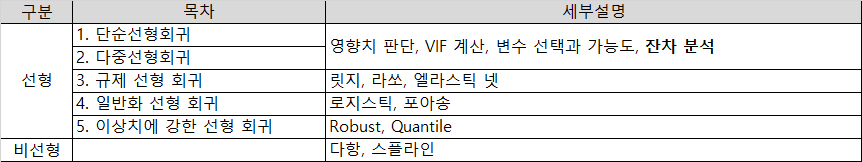

#### 1-1/2. 단순/다중선형회귀
- 가정: **잔차의 정규성/등분산성/독립성** (독립변수는 서로 선형적으로 독립) + 선형성
- 전처리
  1) 이상치, 결측치 처리
  2) 범주형 변수: n-1개 더미코딩 (원핫인코딩은 다중공선성 문제로 사용 X)
  3) 영향치: Leverage H, Cook's distance 등으로 레버리지 측정
  4) 다중공선성: 지식/직관을 이용한 일부 제거, 변수 선택법, VIF 계산 등
  5) 종속변수 스케일링: 등분산성 or 정규성 위반 시 Box-cox, 로그 변환 등 시도
- 잔차 분석: 모델 적합 후 잔차 가정 위반시 전처리 재실시 or 데이털 리샘플링

#### A. 회귀분석

In [ ]:
# A-1. 단순선형회귀: statsmodels --> 모델 적합 결과 잘 보여줌!
import statsmodels.api as sm
X = diabetes.filter(['bmi'])
Y = diabetes.filter(['target'])

Xc = sm.add_constant(X) #절편 추가
model = sm.OLS(Y, Xc) # 잔차제곱합을 최소화 하는 ordinary least squares
fitted = model.fit()
resid = fitted.resid #모델의 잔차 추출
print(fitted.summary()) #모델 결과 요약

# A-2. 단순선형회귀: sklearn --> 예측 적용 가능!
from sklearn.linear_model import LinearRegression
X = diabetes.filter(['bmi'])
Y = diabetes.filter(['target'])

LR = LinearRegression()
LR.fit(X, Y)
pred = LR.predict(X) # 회귀모델로 X값에 대한 예측값 생성

print("회귀계수: ", LR.coef_) 
print("절편: ", LR.intercept_)
print("결정계수: {:.3f}".format(LR.score(X, Y)))

# A-3. 다중선형회귀: statsmodels --> 모델 적합 결과 잘 보여줌!
import statsmodels.api as sm
X = diabetes.filter(['bmi', 'age', 'sex', 'bp'])
y = diabetes.filter(['target'])

def multiR_fitted(X, y): #return fitted, summary
    X_ = sm.add_constant(X)
    model = sm.OLS(y, X_)
    fitted = model.fit()
    return fitted, fitted.summary()

fitted, summary = multiR_fitted(X, y)

# B. Test set으로 검증력 확인
from sklearn.metrics import r2_score
pred = fitted.predict(X_test)
print(">>> test score {:.3f}".format(r2_score(y_test, pred)))

#### B. 영향치 판단
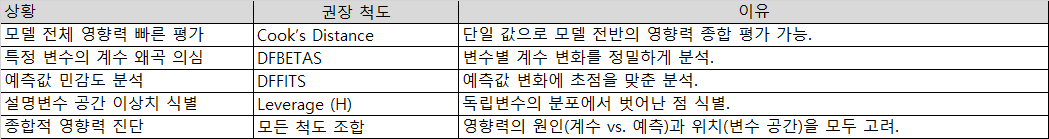

[최종 권장사항]
- 초기 분석에는 Cook’s Distance와 Leverage를 사용해 영향력 후보 식별
- 심층 분석에서는 DFBETAS/DFFITS로 세부 원인을 파악하고, 레버리지와 잔차를 비교해 현실적 중요성 평가

In [ ]:
# B-1. 영향치 판단
def get_influence(fitted):
    cook = fitted.get_influence().cooks_distance[0]
    dfb = fitted.get_influence().dfbetas[:,0]
    dff = fitted.get_influence().dffits_internal[0]
    lev = fitted.get_influence().hat_matrix_diag
    df = DataFrame({"cooks_distance":cook, 
                       'dfbetas':dfb, 'dffits':dff,
                      'leverageH':lev})
    return df

influ_df = get_influence(fitted)  
print(influ_df)

# B-2. Cook's distance 기준, 영향치 검출
def find_idx_cooks(fitted):
    cook = fitted.get_influence().cooks_distance[0]  # Cook's distance 추출
    n = len(fitted.model.endog)  # 종속변수 관측치 수 (y의 길이)
    P = fitted.get_influence().k_vars # 변수의 개수 (상수항 포함) 
    score = 4 / (n-P-1)  # 보수적으로 1 적용 가능 (강한 영향력만 식별)
    idx = np.where(cook > score)[0]
    return idx

idx = find_idx_cooks(fitted)
print("Cook's distance 기준 영향치: ", idx)

# B-3. DFBETAS 기준, 영향치 검출 (각 독립변수 계수별)
def find_idx_dfbetas(fitted, coef_idx=1):  # coef_idx: 검증할 계수 인덱스 (기본값: 첫 번째 독립변수)
    dfb = fitted.get_influence().dfbetas[:, coef_idx]  # 특정 계수 선택
    n = fitted.nobs  # 단순하고 직관적인 n 계산
    score = 2 / np.sqrt(n)
    idx = np.where(np.abs(dfb) > score)[0]  # 절대값 적용
    return idx

# 사용 예시 (첫 번째 독립변수 계수 검증)
idx2 = find_idx_dfbetas(fitted, coef_idx=1)
print("DFBETAS 기준 영향치: ", idx2)

# B-4. DFFITS 기준, 영향치 검출
def find_idx_dffits(fitted):
    dff = fitted.get_influence().dffits_internal[0]
    P = fitted.get_influence().k_vars  # 독립변수 수 (상수항 포함)
    n = fitted.nobs  # 표본 크기 직접 추출
    score = 2 * np.sqrt(P / n)  
    idx = np.where(np.abs(dff) > score)[0]  # 절대값 적용
    return idx

idx3 = find_idx_dffits(fitted)
print("DFFITS 기준 영향치: ", idx3)

# B-5. Leverage H 기준, 영향치 검출
def find_idx_leverageH(fitted):
    lh = fitted.get_influence().hat_matrix_diag  # 레버리지 값 추출
    P = fitted.get_influence().k_vars  # 상수항 포함한 독립변수 수
    n = fitted.nobs  # 표본 크기 직접 추출
    score = 2 * P / n  # 올바른 임계값 공식
    idx = np.where(lh > score)[0]  # 인덱스 배열 추출
    return idx

idx4 = find_idx_leverageH(fitted)
print("Leverage H 기준 영향치: ", idx4)

#### C. VIF 계산

In [ ]:
# VIF 10 이상이면, 설명변수들이 높은 상관성을 가짐
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

def check_vif(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    model.fit()
    vif_df = pd.DataFrame(columns=['feature', 'VIF'])
    for i in range(1, len(model.exog_names)):
        vif_df.loc[i, 'feature'] = model.exog_names[i]
        vif_df.loc[i, 'VIF'] = round(VIF(model.exog, i), 3)
    return vif_df.sort_values('VIF', ascending=False)

print(check_vif(X, y))

#### D. 변수 선택

In [ ]:
## 단계적 선택법
import statsmodels.api as sm
from itertools import combinations
def stepwise_method(X, y, criterion='AIC'): #'BIC', 'CP', 'adj_R2'
    result = DataFrame()
    feature_combis = [] #변수 조합의 모든 경우의 수
    for i in range(1, len(X.columns)+1):
        feature_combis += list(combinations(X.columns, i))
    feature_combis.reverse() #p개수 내림차순
    
    for j, feature_combi in enumerate(feature_combis):
        X_ = X.filter(feature_combi)
        X_ = sm.add_constant(X_) #절편 추가
        model = sm.OLS(y, X_)
        fitted = model.fit() #모델 적합
        n = fitted.nobs #number of observations
        p = fitted.df_model #설명변수의 개수
        if j==0:
            MSE_full = fitted.mse_resid # full모델의 MSE
        
        #각 기준값 계산
        aic = fitted.aic
        bic = fitted.bic
        cp = sum((fitted.resid)**2)/MSE_full - (n-2*(p+1))
        adj_R2 = fitted.rsquared_adj
        
        #각 기준값 입력
        result.loc[j, 'feature_combi'] = ", ".join(list(fitted.params.keys()))
        result.loc[j, 'AIC'] = aic
        result.loc[j, 'BIC'] = bic
        result.loc[j, 'CP'] = cp
        result.loc[j, 'adj_R2'] = adj_R2
        
        if criterion in ['AIC', 'BIC']: #낮을수록 Best
            result = result.sort_values(by=criterion, ascending = True)
            best = result.iloc[0, 0]
        elif criterion in ['adj_R2']: #높을수록 Best
            result = result.sort_values(by=criterion, ascending = False)
            best = result.iloc[0, 0]
        elif criterion in ['CP']: #CP값이 작고, 변수의 개수와 유사할수록 Best
            best_idx = np.abs(result['CP']-result['feature_combi'].
                              apply(lambda x: x.count(',')+1)).sort_values(ascending=True).index
            result = result.loc[best_idx, :]
            best = result.iloc[0, 0]
        else:
            print("criterion options only cover AIC, BIC, CP, adj_R2.")
    return best, result

best, result = stepwise_method(X, y, criterion='AIC')
print("최적의 변수 조합: ", best)
print(f"전체 결과값: \n{result}\n")

for c in ['AIC', 'BIC', 'CP', 'adj_R2']:
    best, result = stepwise_method(X, y, c)
    print(f"기준 {c}에 의한 최적의 변수 조합 {best}")

#### E. 잔차분석
- Shapiro-Wilk(정규성), Breusch-Pagan(등분산성) 검정  
  **H0: 정규성/등분산성이 존재한다** --> P-value가 커야 정규성/등분산성 있음

In [ ]:
from scipy.stats import zscore, probplot
import statsmodels.api as sm
X_ = sm.add_constant(X)
model = sm.OLS(y, X_)
fitted = model.fit()
resid = fitted.resid # 잔차
pred = fitted.fittedvalues #예측값
sresid = zscore(resid) #표준화 잔차

########################################################

# E-1-1. 정규성 확인: 히스토그램, QQ plot, Jarque-Bera
from matplotlib import pyplot as plt
from statsmodels.stats.stattools import jarque_bera
stats, p, skew, kurt = jarque_bera(resid)
print(" Jarque-bera: stats {:.3f}, p-value {:.3f}".format(stats, p))
  # Jarque bera: H0 = 정규분포와 차이가 없다. 
print(" 왜도 {:.3f}, 첨도 {:.3f}".format(skew, kurt))
  # 정규분포는 왜도는 0, 첨도는 3

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(resid)
probplot(resid, plot=ax[1])
plt.show()

# E-1-2. 정규성 검증: Shapiro-Wilk 검정 (H0: 데이터가 정규분포를 따른다)
stat, p = shapiro(resid)
print(f'shapiro p-value: {p}')
sm.qqplot(resid, line='s', ax=ax[0])  


# E-2-1. 등분산성 확인: 그래프
import seaborn as sns
fig, ax = plt.subplots(1,4, figsize=(12,3))
for feature, ax in zip(X.columns, ax.ravel()):
    sns.regplot(x=X[feature], y=sresid, line_kws={'color':'C1'}, ax=ax)
plt.show()
  # 각 독립변수와 잔차의 분산이 일정하면 가운데 회귀선이 수평하게 표시
  # 표준화 잔차의 값이 +/-2를 벗어나면 이상값 또는 특이값 예상 가능

# E-2-2. 등분산성 확인: Breusch-Pagan 검정 (H0: 등분산성이 존재한다 (잔차의 분산이 일정하다))
bp_stat, bp_p, _, _ = het_breuschpagan(resid, fitted.model.exog)
print(f'Breusch-Pagan p-value: {bp_p}')
plt.scatter(fitted.fittedvalues, resid)


# E-3. 독립성 확인
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(resid)
print(" Durbin-watson 통계량 {:.3f}".format(dw))
  # 2 근접시 잔차 간 독립, 0 근접시 양의 상관, 4 근접시 음의 상관

#### 1-3. 규제 선형 회귀
- 규제(=정규화)를 적용하여 회귀계수의 과다 추정 및 모델의 과적합을 방지
- scikit-learn 사용시, alpha 클수록 규제 강도 높아져 모델 복잡성 및 과적합 가능성 감소

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# A. 릿지 회귀 (L2, 유클리디언 거리, 계수 0 불가)
from sklearn.linear_model import Ridge
a = 0.9  # 규제 강도 alpha
ridge = Ridge(alpha=a).fit(X_train, y_train)
train_s = ridge.score(X_train, y_train)
test_s = ridge.score(X_test, y_test)
print(" train set score: {:.3f}, test set score: {:.3f}".format(train_s, test_s))
for i, coef in enumerate(ridge.coef_.ravel()):
    print(" 회귀계수 {}: {:.2f}".format(i, coef))
print(" 절편: {:.2f}".format(ridge.intercept_[0]))

# B. 라쏘 회귀 (L1, 맨하탄 거리, 계수 0 가능 (특정변수 제거 가능))
# 일반적으로 릿지 선호하지만, 특성이 많고 일부만 중요하다면 라쏘 선택 (분석/해석이 쉬움)
from sklearn.linear_model import Lasso
a = 0.9
lasso = Lasso(alpha=a).fit(X_train, y_train)
train_s = lasso.score(X_train, y_train)
test_s = lasso.score(X_test, y_test)
print(" train set score: {:.3f}, test set score: {:.3f}".format(train_s, test_s))
for i, coef in enumerate(lasso.coef_.ravel()):
    print(" 회귀계수 {}: {:.2f}".format(i, coef))
print(" 절편: {:.2f}".format(lasso.intercept_[0]))

# C. 엘라스틱 넷 (L1+L2, ll_ratio로 비율 결정)
from sklearn.linear_model import ElasticNet
a = 0.1  # alpha는 패널티 조건을 곱하는 상수로서 0이면 LinearRegression과 동일
l1_ratio = 0.1  # l1_ratio: L1과 L2 규제 조합비 (0이면, L2 / 1이면, L1 규제 적용)
en = ElasticNet(alpha=a, l1_ratio=l1_ratio).fit(X_train, y_train)
train_s = en.score(X_train, y_train)
test_s = en.score(X_test, y_test)
print(" train set score: {:.3f}, test set score: {:.3f}".format(train_s, test_s))
for i, coef in enumerate(en.coef_.ravel()):
    print(" 회귀계수 {}: {:.2f}".format(i, coef))
print(" 절편: {:.2f}".format(en.intercept_[0]))

#### 1-4. 일반화 선형 회귀 (GLM)
정규분포를 따르지 않는 종속변수에 연결 함수를 적용하여 독립변수에 따라 선형적으로 변화
- 지수, 감마 분포: negative inverse
- 포아송 분포: 로그 변환 (**포아송 회귀**: 종속변수가 개수, 빈도)
- 베르누이, 다항, 이항 분포: logit 변환 (**로지스틱 회귀**: 종속변수가 베르누이 분포, 0 or 1)

#### A. 로지스틱 회귀
- 장점: 모델 구현 쉬움, 빠른 효율적 계산, 해석 용이
- 단점: 이상치에 민감, 표본 크기 작으면 추청치 불안정
- 오즈비 = exp(회귀 계수) = X 단위 1 증가시 odds 증가량 / 잔차 분석 진행 X 

**[유효성 검정]**
- 회귀계수: Z통계량 --> Z분포 p-value  
  (Z통계량 제곱한 Wald 통계량: 자유도 1인 카이제곱 분포로 검정)
- 모델: 로그우도비 (LLR) 통계량 --> 카이제곱 분포 p-value

In [ ]:
########### sklearn (모델을 활용하여 예측 가능) ##############

from sklearn.linear_model import LogisticRegression

# 1) 로지스틱 회귀 적합: C값이 높을수록 규제가 약해지고, 모델 복잡성이 높아진다. 
LR = LogisticRegression(C=0.01, max_iter=1000)
LR.fit(X_train, y_train)

# 2) 회귀식을 반환하는 함수 정의
def regression_formula(feature_names, coef, intercept):
    msg = "y = "
    for i, feature in enumerate(feature_names):
        coef = coef.ravel()
        msg += "+ {:.3f}*'{}' ".format(coef[i], feature)
    if intercept.shape == (1,):
        intercept = intercept[0]
    else:
        intercept = intercept
    msg += "+ {:.3f}".format(intercept)
    msg = msg[:4] + msg[6:]
    return msg

print("로지스틱 회귀식: \n", regression_formula(X_names, LR.coef_, LR.intercept_))

# 3) 예측값 계산
prob = LR.predict_proba(X) #각 클래스에 대한 예측확률값
pred = LR.predict(X) # 예측값
## predict_proba: mu 계산, decision_function: XBeta 계산
#기본 cut-off value(임계값)는 0.5: 확률값이 0.5 이상이면 1, 이하이면 0으로 분류

result = DataFrame(prob)
result['pred'] = pred
result['y'] = y
print("각 클래스일 확률에 따른 예측분류값과 실제분류값:\n", result.head(4))

# 3-1) cut-off value 변경: Youden Index (Youden's J statistic)
# J = 민감도 + 특이도 - 1 --> 특이도와 민감도 합의 최대점을 구하여 최적의 cut-off value 선정
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, prob[:, 1]) #실제값과 예측 확률값 활용
J = tpr - fpr  # 민감도(tpr) + 특이도 (1-fpr) - 1 = tpr + 1 - fpr - 1 = tpr - fpr
idx= np.argmax(J)
best_threshold = thresholds[idx]
best_tpr = tpr[idx]
best_fpr = fpr[idx]
print("최적의 cut-off value: {:.3f}".format(best_threshold))


########### statsmodel (모델 적합 결과 잘 표현) ##############
# 1) 모델 적합: sklearn에서 자동으로 규제를 적용하고 있기에 다른 회귀식이 도출
# sklearn의 C를 매우 큰 수로 설정하여 규제가 없다시피 하면, 두 라이브러리의 회귀식이 유사
import statsmodels.api as sm
from scipy.stats import chi2
X_train = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train)
fitted = model.fit()

print(fitted.summary())

# 2) 회귀계수 유의성 확인 
# 요약 결과에서는 z통계량 사용 --> z통계량 제곱한 wald통계량도 사용 가능
z = (10.3953/2.119)  # 예시. x1의 회귀계수와 표준오차
waldstat = z**2 
cv = chi2.ppf(1-test_a, 1)
sp = 1-chi2.cdf(waldstat, 1)
print("wald 통계량 {:.3f}, 임곗값: {:.3f}".format(waldstat, cv))
print("유의수준 {:.3f}, 해당 통계량의 유의확률 {:.3f}".format(test_a, sp))

# 3) 모델 유의성 확인
# summary에 표기된 'LLR p-value < 유의수준'이면 해당 모델은 통계적으로 유의함

#### B. 포아송 회귀
- exp(회귀 계수) = X 단위 1 증가시 빈도수 증가량

**[유효성 검정]**
- 회귀계수: Z 통계량 --> Z분포 p-value  
  (Z통계량 제곱한 Wald 통계량: 자유도 1인 카이제곱 분포로 검정)
- 모델 (특이하게, H0: 희귀모델 유효하다 --> 즉, **p-value가 커야 모델 유효**)
  1) Pearson 통계량 --> 카이제곱 분포 (df= n-k-1) 
  2) deviance 통계량 --> 카이제곱 분포 (df= n-k-1)

In [ ]:
########### sklearn (모델을 활용하여 예측 가능) ##############

from sklearn.linear_model import PoissonRegressor
from pandas import DataFrame, read_csv, get_dummies

awards = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/8-1-4_awards.csv')
X = awards.filter(['prog', 'math']) 
X = get_dummies(X, drop_first=True, columns=['prog'])
y = awards.filter(['num_awards']) 
# 종속변수인 'num_awards'가 정규분포가 아닌 포아송 분포를 따른다고 본다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 1) 포아송 회귀 적합
# 파라미터 alpha가 커질수록 규제가 커지고, alpha가 0이면 규제가 없는 것과 같다. 
PR = PoissonRegressor(alpha=0.2)
PR.fit(X_train, y_train.values.ravel())

# 2) 회귀식을 반환하는 함수 정의
def regression_formula(feature_names, coef, intercept):
    msg = "y = "
    for i, feature in enumerate(feature_names):
        coef = coef.ravel()
        msg += "+ {:.3f}*'{}' ".format(coef[i], feature)
    if intercept.shape == (1,):
        intercept = intercept[0]
    else:
        intercept = intercept
    msg += "+ {:.3f}".format(intercept)
    msg = msg[:4] + msg[6:]
    return msg

print("포아송 회귀식: \n", regression_formula(X.columns, PR.coef_, PR.intercept_))

# 3) 예측값 계산
pred = PR.predict(X)
result = DataFrame()
result['pred'] = pred
result['Xbeta'] = np.log(pred)
result['y'] = y
print("예측빈도값과 실제빈도값:\n", result.tail(6))


########### statsmodel (모델 적합 결과 잘 표현) ##############
# 1) 모델 적합: sklearn에서 자동으로 규제를 적용하고 있기에 다른 회귀식이 도출
# sklearn의 alpha를 0으로 설정하여 규제를 없애면, 두 라이브러리의 회귀식이 유사
import statsmodels.api as sm
X_train = X_train.astype(float)  # 더미변수를 bool형에서 float형으로 변환 필요
X_train = sm.add_constant(X_train)
model = sm.GLM(y_train, X_train, family=sm.families.Poisson())
fitted = model.fit()
print(fitted.summary())

# 2-1) 모델 유의성 확인: Pearson chi2 (df=n-k-1) / H0: 모델이 유의하다.
pearson = DataFrame(y_train)
pearson['pred'] = fitted.fittedvalues
pearson['squared_gap'] = (pearson['num_awards'] - pearson['pred'])**2
pearson['squared_gap/pred'] = pearson['squared_gap']/pearson['pred']
pstats = pearson['squared_gap/pred'].sum()
pval = 1-chi2.cdf(pstats, fitted.df_resid)  # pstats는 summary에 표기되어 있음
print("pearson chi2 stats: {:.3f}(={:.3f}), p-value: {:.3f}".format(pstats, fitted.pearson_chi2, pval))

# 2-2) 모델 유의성 확인: deviance (chi2 ~ df=n-k-1) / H0: 모델이 유의하다.
deviance = DataFrame(y_train['num_awards'])
deviance['pred'] = fitted.fittedvalues
deviance['Log'] = np.log(deviance['num_awards']/deviance['pred'])*deviance['num_awards']
deviance['num-pred'] = deviance['num_awards'] - deviance['pred']
dstats = deviance['Log'].sum()*2 - deviance['num-pred'].sum()*2
pval2 = (1-chi2.cdf(dstats, fitted.df_resid))**2
print("deviance chi2 stats: {:.3f}, p-value: {:.3f}".format(dstats, pval2))
print("R2: {:.3f}".format(1-fitted.llf/fitted.llnull))

# 3) 회귀계수 유의성 확인
# 요약 결과에서는 z통계량 사용 --> z통계량 제곱한 wald통계량도 사용 가능
z = (0.0673/0.012)  # 예시. math의 회귀계수와 표준오차
waldstat = z**2 
cv = chi2.ppf(1-test_a, 1)
sp = 1-chi2.cdf(waldstat, 1)
print("wald 통계량 {:.3f}, 임곗값: {:.3f}".format(waldstat, cv))
print("유의수준 {:.3f}, 해당 통계량의 유의확률 {:.3f}".format(test_a, sp))

#### 1-5. 이상치에 강한 선형 회귀

In [ ]:
# A. Robust regression
  # OLS는 잔차 제곱합을 이용하기에 이상치 왜곡 문제 발생
  # 잔차의 제곱 대신 절대값의 합이 최소화 되는 계수 추정 --> Robust Regression
  # HuberRegressor: epsilon으로 이상치 샘플 수 컨트롤, 낮을 수록 더 Robust!

from sklearn.linear_model import HuberRegressor
HR = HuberRegressor(epsilon=1).fit(X, y)
HR_pred = HR.predict(X)
print("Huber coefficients {}, score {:.3f}".format(HR.coef_, HR.score(X, y)))

# B. Quantile regression
  # 특정 분위값 추정 (ex. 중앙값)하여 이상치의 영향을 거의 받지 않음
  # 이분산 데이터도 회귀 모델링 가능 / L1 규제 가능 (alpha로 강도 조절)

from sklearn.linear_model import QuantileRegressor
QR = QuantileRegressor(alpha=0).fit(X, y)
QR_pred = QR.predict(X)
print("Quantile coefficients {}, score {:.3f}".format(QR.coef_, QR.score(X, y)))

#### 2. 비선형회귀

In [ ]:
# A-1. 다항회귀 (sklearn)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=True)
#degree: 다항식 차수 지정  /  include_bias: 절편 추가여부
px = poly_features.fit_transform(x.reshape(-1,1))

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(px, y)
pred = LR.predict(px)
print("sklearn R2: {:.3f}".format(LR.score(px, y)))

# A-2. 다항회귀 (statsmodels)
import statsmodels.api as sm
model = sm.OLS(y, px) #sklearn의 PolynomialFeatures로 변환한 feature를 사용
fitted = model.fit()
print(fitted.summary())

# B. 스플라인회귀
  # 다항 구간들을 부드러운 곡선 형태로 적합 (스플라인 구간 구분값: 매듭(Knot))
  # n_splines = n_knots + degree - 1 (extrapolation="periodic'이면 n_knots-1)

# B-1. 스플라인회귀 (sklearn)
from sklearn.preprocessing import SplineTransformer
spline = SplineTransformer(degree=3, n_knots=4)
sx = spline.fit_transform(x.reshape(-1,1))

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(sx, y)
pred = LR.predict(sx)
print("sklearn R2: {:.3f}".format(LR.score(sx, y)))

# B-2. 스플라인회귀 (statsmodels)
import statsmodels.api as sm
model = sm.OLS(y, sx) #sklearn의 SplineTransformer로 변환한 feature를 사용
fitted = model.fit()
print(fitted.summary())

### **Supervised ML**

#### 1. 의사결정나무
- 불순도 for 분류결정트리: 엔트로피(0 ~ 1), 지니 불순도(0 ~ 1), log loss  
  불순도 for 회귀결정트리: squared error, friedman MSE, absolute error, poisson
- **엔트로피 및 지니불순도** 계산 코드는 '코드북' 텍스트북에!
- 장점: 계산 비용 낮음, 해석/이해 쉬움, 정규화/표준화 전처리 불필요, 이상치/결측치 강함  
  단점: 모든 특성 사용하기에 과적합 위험 -> 사전 가지치기 (ex. 최대 깊이, 리프 최대 개수 등)  
        모델 밖의 데이터 범위에서는 새로운 데이터 예측 불가 (따라서, 시계열에 부적합)

In [ ]:
# 결정 트리 적합하기 (분류)
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
# from sklearn.tree import DecisionTreeRegresssor  회귀 결정 트리
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=43)

tree=DecisionTreeClassifier(max_depth=3, criterion='gini') # 3층 깊이의 결정 트리 생성
tree.fit(X_train, y_train)

y_pred=tree.predict(X_test) #예측값
print("Tree Score: {:.3f}".format(tree.score(X_test, y_test))) #mean accuracy

# 결정트리 시각화
plot_tree(tree, class_names=cancer.target_names, feature_names=cancer.feature_names, 
          impurity=True, filled=True, rounded=True)
print(export_text(tree))  # 트리 분기 텍스트로 확인

# feature 중요도 확인
plt.subplots(1,1, figsize=(6,8))
fi = tree.feature_importances_
fn = cancer.feature_names
plt.barh(fn, fi)

#### 2. 앙상블

#### 2-1. 배깅 
- OOB(out-of-bag): 36.8% 한 번도 훈련에 포함되지 않은 데이터. 성능 검증에 활용)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

ESTIMATOR = DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)
bagging = BaggingClassifier(ESTIMATOR, n_estimators=50, oob_score=True, n_jobs=-1, 
                            random_state=0, max_samples = 1.0, max_features = 1.0)
# max_samples=1.0 / max_features = 1.0 --> train set 100% 활용  
bagging.fit(X_train, y_train)

##### [반복1] 추정 및 성능 확인 ###### (1회만 기록)
bagging_pred = bagging.predict(X_test) #test set에 대한 예측값
bagging_prob = bagging.predict_proba(X_test)[:, 1] #test set의 1에 대한 예측 확률

print('train set accuracy: {:.3f}'.format(bagging.score(X_train, y_train)))
print('test set accuracy: {:.3f}'.format(bagging.score(X_test, y_test)))
print('OOB accuracy: {:.3f}'.format(bagging.oob_score_))
#####################################

#### 2-2. 부스팅
- 잔차가 큰 데이터 가중치 높여 오차를 줄이는 방향으로, 모델을 **순차적으로** 생성
- Adaptive (Ada) / Gradient (GBM) / Stochastic gradient (XGB)

In [ ]:
# A. 부스팅: AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42, n_estimators=50)
ada.fit(X_train, y_train)

##### [반복2] 특징 중요도 확인 ###### (1회만 기록)
fi = ada.feature_importances_
fn = cancer.feature_names
fig, ax = plt.subplots(figsize=(7,10))
plt.barh(fn, fi)
#####################################

# B-1. 부스팅: Gradient Boosting (1) - GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0, n_estimators=50)
gbc.fit(X_train, y_train)

# B-2. 부스팅: Gradient Boosting (2) - LightGBM
!pip install lightgbm
from lightgbm import LGBMClassifier, plot_importance, plot_tree, create_tree_digraph
lgbm = LGBMClassifier(n_estimators=50)
lgbm.fit(X_train, y_train, eval_metric='logloss', eval_set=[(X_test, y_test)]) 

# 트리 시각화
fig, ax = plt.subplots(figsize=(15,10))
plot_tree(lgbm, ax=ax)
plt.show()

# C. 부스팅: Stochastic gradient boosting - xgboost
!pip install xgboost
from xgboost import plot_importance, XGBClassifier
xg = XGBClassifier(objective='binary:logistic', n_estimators=50, eval_metric='logloss')
xg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

#### 2-3. 랜덤포레스트
- 장점: 트리 병렬 실행하여 계산비용 낮음, 매개변수 튜닝 및 표준화/정규화 필요 없음  
  단점: 단일 트리보다 예측 성능은 뛰어나지만 직관적 해석 불가, 고차원 희소 데이터 작동 X
- Extra-trees: RF와 유사, 다만 가지 분할 시 최적 임계값 대신 랜덤 임곗값 사용 

In [ ]:
# A. Random Forest
# 랜덤포레스트에서는 단일 트리의 경우보다 훨씬 많은 특성이 0 이상의 중요도 값을 갖는다.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=0)
rf.fit(X_train, y_train)

# B. Extra-trees
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=50, random_state=0)
xtree.fit(X_train, y_train)

#### 2-4. 스태킹
- 각 앙상블 모델로부터 얻은 예측 확률 or 값을 데이터로, 한번 더 모델링하여 성능 개선

In [ ]:
titles = ['bagging', 'adaboost', 'gboost', 'lgbm', 'xgboost', 'random forest', 'xtree']
preds = [bagging_pred, ada_pred, gbc_pred, lgbm_pred, xg_pred, rf_pred, xtree_pred]
probs = [bagging_prob, ada_prob, gbc_prob, lgbm_prob, xg_prob, rf_prob, xtree_prob]

# 각 앙상블들의 예측 확률을 feature로, 실제 y_test값을 target으로 하는 모델 생성
probs_df = DataFrame(probs).T
meta_learner = RandomForestClassifier(n_estimators=30, random_state=0, max_depth=3)
meta_learner.fit(probs_df, y_test)
meta_learner_pred = meta_learner.predict(probs_df) #test set에 대한 예측값

# 트리모델들의 테스트 스코어 비교
from sklearn.metrics import accuracy_score

for title, pred in zip(titles, preds):
    score = accuracy_score(y_test, pred)
    print("{} score: {:.3f}".format(title, score))

print("**stacking score: {:.3f}".format(accuracy_score(meta_learner_pred, y_test)))

#### 3. KNN
- 모든 독립변수는 **수치형** 필수, 척도 차이를 없애기 위한 **변환(스케일링)** 필요
- K 선택: 보통 1~20 홀수 선택 후 성능 비교. K가 너무 작으면(크면) 과대(소)적합 문제 발생
- 장점: 이해 쉬움, 많은 조정없이 좋은 성능, 더 복잡한 알고리즘 적용 전 시도  
  단점: 전처리 중요, 예측이 느리고 많은 특성 처리 능력 부족 --> 현업에서 사용률 낮음

In [ ]:
# A. KNN 분류
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=2)
knn.fit(X_train, y_train)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print("train score {:.3f}, test score {:.3f}\n".format(train_score, test_score))

distance_to_n, index_of_n = knn.kneighbors(X_test)
i = 0
print("해당 데이터: ", X_test[i])
print("해당 데이터와 이웃들과의 거리: ", distance_to_n[i])
print("해당 데이터의 이웃들의 인덱스: ", index_of_n[i]) #X_train에서 이웃들을 찾을 수 있음

# B. KNN 회귀
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=15, weights='distance', p=1)
# weights='distance' --> 거리가 가까울수록 높은 가중치 (KNN 회귀에서 사용)
knnr.fit(X_train, y_train)

#### 위와 동일한 코드 반복 ####

#### 4. SVM
- 주요 매개 변수
  1) Kernel: linear, poly, rbf, sigmoid 등 / 기본값은 rbf (가우시안 커널)
  2) gamma: rbf 폭의 역수. 0보다 큰 값. 작은 값은 결정 경계를 천천히 바꿔 모델 복잡도 낮춤
  3) C: 0~1 사이 규제. 각 포인트의 중요도 제한. C값이 크면 정확하게 분류
- 장점: 특성이 적어도 복잡한 결정경계 구성 가능, 저/고차원 데이터 모두 잘 작동  
  단점: 대용량 데이터 작동 X, 데이터 전처리와 매개변수 설정에 신경 많이, 모델 설명 X

In [ ]:
# A. SVM classifier
from sklearn.svm import SVC

# feature 스케일링 진행 후 적합
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, stratify=y, test_size=0.3)

clf = SVC(C=0.1, kernel='rbf', gamma='auto')
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("[스케일 후] train score: {:.3f}, test score: {:.3f}\n".format(train_score, test_score))
## feature scaling 없이 적합하면 성능 하락

print("support vector의 개수: ", len(clf.dual_coef_[0]))
# kernel이 rbf일 때는 dual_coef_, linear일 때는 coef_로 SV의 중요도를 확인할 수 있다.
print("support vector의 중요도: ", clf.dual_coef_[0][0:5])
print("support vector의 인덱스: ", clf.support_[0:5])
print("support vector의 값: ", clf.support_vectors_[0:5].shape)

# B. SVM regressor
from sklearn.svm import SVR

# feature 스케일링 진행 후 적합
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3)

reg = SVR(C=15, kernel='rbf', gamma='auto')
reg.fit(X_train, y_train)

#### 위와 동일한 코드 반복 ####

#### 5. 나이브 베이즈 분류
- **베이즈 통계 계산**은 '코드북' 텍스트북에!
- 독립 & 종속변수 **모두 범주형** 필요 (독립변수가 수치형이면 범주형으로 변환)
- 베이지안 분류기: GaussianNB (연속형 독립 변수), BernoulliNB(이진형 독립 변수)  
  MultinomialNB (독립변수가 빈도 데이터), CategoricalNB (독립변수가 카테고리 분포)
- 장점: 훈련/예측 속도 빠름, 훈련 과정 이해 쉬움, 희소한 고차원 데이터 작동, 매개변수 민감 X  
  단점: 일반화 성능이 조금 낮음

In [ ]:
# A. GaussianNB (손글씨 숫자 이미지 판독)
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
X = load_digits().data
y = load_digits().target
idx = 0

X_train, X_test, y_train, y_test = train_test_split(X, y)
GNB = GaussianNB()
GNB.fit(X_train, y_train)
train_score = GNB.score(X_train, y_train)
test_score = GNB.score(X_test, y_test)
print("Train score {:.3f}, Test score {:.3f}".format(train_score, test_score))

#실제 숫자 이미지와 예측한 숫자 확인하기
pred = GNB.predict(X[idx].reshape(-1,len(X[idx])))
print("예측한 숫자: {} \n실제 숫자:".format(pred))
plt.rcParams['figure.figsize'] = (3,3)
plt.imshow(X[idx].reshape(8,8))
plt.show()

In [ ]:
# B. 스팸 이메일 판별
from pandas import read_csv
emails = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/9-4_spam.csv')
         .sample(300).reset_index(drop=True) #300개만 샘플링

# dtm(document-term matrix)은 각 단어를 feature로, 문장 내 단어출현빈도를 값으로 가짐
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
Xv = cv.fit_transform(emails['email_title'])
dtm =DataFrame(Xv.toarray(), columns=cv.vocabulary_)
print("DTM: \n{}\n".format(dtm.iloc[:, 1050:1060].head(10)))

X = dtm # 각 단어출현빈도를 feature로, 
y = emails['spam'] # spam 여부를 target으로 함
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# B-1. BernoulliNB
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB(binarize = 0) # 예측변수가 이진변수가 아닌 경우 이진화하여 학습한다
BNB.fit(X_train, y_train)
train_score = BNB.score(X_train, y_train)
test_score = BNB.score(X_test, y_test)
print("Train score {:.3f}, Test score {:.3f}".format(train_score, test_score))

#실제 spam여부와 예측한 spam여부 확인하기
idx = 0
pred = BNB.predict(X.iloc[idx, :].values.reshape(-1, X.shape[1]))
print("예측한 spam여부: {}, 실제 spam여부: {}\n".format(pred, y[idx]))

# 각 class의 사전확률
print("각 class의 사전확률 False: {:.3f}, True: {:.3f}".format(BNB.class_log_prior_[0], BNB.class_log_prior_[1]))

# 각 feature의 각 class에 대한 사후확률 (각 클래스별 단어 중요도로도 볼 수 있음)
result = DataFrame(BNB.feature_log_prob_, columns=cv.vocabulary_, index=['False', 'True'])
print("각 feature의 각 class에 대한 사후확률: \n", result.iloc[:, 1000:1010])

# 따라서, False에 대한 확률값이 낮을수록, True에 대한 확률값이 높을수록 spam일 확률이 높다.

# B-2. MultinomialNB
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

#### 위와 동일한 코드 반복 ####

#### 6. 인공신경망
- 텐서플로우 모델 구현 순서: 모델 구축 -> 구조확인 -> 컴파일 -> 학습 -> 평가 -> 예측
- **다층 퍼셉트론 (MLP)**
  - MLP 학습 1단계 (전향): 입력과 가중치 값을 통해서 출력값 계산  
    MLP 학습 2단계 (후향): 출력과 목표 값 차이에 대해서 가중치 갱신 --> 오차 역전파
  - 장점: 대량 데이터 작동, 매우 복잡한 모델, 좋은 성능  
    단점: 학습이 오래 걸림, 스케일링 등 전처리 필요

In [ ]:
# Tensorflow에서 MNIST 데이터 불러오기
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

# 트레인셋의 unique들(타겟값들, 클래스들)과 그 개수 확인 
unique, counts = np.unique(y_train, return_counts = True)
print("전체 클래스: ", unique)
print("클래스별 데이터 수: ", counts)

# 훈련 데이터세트에서 25개의 숫자 샘플 추출하기
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# Tensorflow로 MLP 구축하기
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.regularizers import l2, l1

## 데이터 전처리: 타겟변수를 원핫벡터로 변환 (0~9 숫자 --> 1x10 행렬)
y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)

# 이미지 차원 (정사각형으로 가정)
image_size = x_train.shape[1] #데이터의 픽셀값들 (28, 28) 
input_size = image_size * image_size

# X는 shape 변환 (28*28를 1*784) 및 변수 스케일링
x_train2 = x_train.reshape(-1, input_size)
x_test2 = x_test.reshape(-1, input_size)
print("X 데이터 형태 변환: ", x_test.shape," -> ", x_test2.shape)

# 각 픽셀값 척도 조정 (0~255 범위 --> 0.0~1.0 범위) 
# 편향 값이 커져서 모델 훈련이 어려워지는 현상 방지를 위한 정규화
# 신경망 출력도 정규화되지만, 훈련이 끝나면 출력 텐서에 255를 곱해서 정수 픽셀값으로 모두 복구
x_train2 = x_train2.astype('float32') / 255
x_test2 = x_test2.astype('float32') / 255

## 모델 구축
input_shape = input_size
batch_size = 128
epochs = 10
hidden_units = 256
dropout = 0.45

# 3개의 계층으로 이루어진 MLP에 정규화 요소, 일반화 요소, 활성화 함수를 적용.
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_shape, kernel_regularizer=l2(0.001)))
model.add(Dropout(dropout))
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(y_train2.shape[1], activation='softmax'))
model.summary()

plot_model(model)

# 모델 컴파일
model.compile(loss=['categorical_crossentropy'], metrics=['accuracy'], optimizer='adam')

# 모델 학습
fitted = model.fit(x_train2, y_train2, validation_data= (x_train2, y_train2,), 
                   epochs=epochs, batch_size= batch_size)

# 학습 히스토리 확인
from pandas import DataFrame
result=DataFrame(fitted.history)
print("\n학습 히스토리:\n", result.tail(3))

# 모델 평가
loss, acc = model.evaluate(x_test2, y_test2, batch_size=batch_size, verbose=False)
print("\n테스트 셋의 loss {:.3f}, accuracy {:.3f}\n".format(loss, acc))

# 모델 예측
j = 0
pred = model.predict(np.reshape(x_test2[j], (-1, input_shape)))
pred.flatten() 
print("예측값: ", pred.round(1))
print("실제값: ", y_test2[j])
plt.imshow(x_test2[j].reshape(-1,image_size))
plt.show()

### **Unsupervised ML**

#### 1. 차원 축소
- 계산 비용 절감, 데이터 노이즈 감소, 데이터셋 다루기 쉬움, 결과 이해 쉬워짐 등
- 3가지 방법: Feature selection / Feature extraction / Clustering

#### 1-1. 주성분 분석 (PCA)
- 독립변수들의 정규분포 가정 / 척도 상이하지 않도록 표준화 변수 변환 필요
- 장점: 고차원 데이터 손실 최소화하며 차원 축소  
  단점: 그래프 해석 어려움 (주성분은 여러 특성의 조합), 비선형 구조 반영 불가

In [ ]:
##### [반복] 데이터 불러오기 #####
from sklearn.datasets import load_wine
load = load_wine()
X = DataFrame(load['data'], columns = load['feature_names'])
y = load['target']

##### [반복] 데이터 표준화 #####
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = DataFrame(ss.fit_transform(X), columns=X.columns)

# PCA 적합
from sklearn.decomposition import PCA
model = PCA(n_components=X.shape[1], svd_solver='auto') #전체 feature 수를 입력
model.fit(scaled_X)

# 고유값 요약
e_value = DataFrame({'고유값':model.explained_variance_, '기여율':model.explained_variance_ratio_}, 
                    index=['comp%s'%i for i in range(1,X.shape[1]+1)])
e_value['누적기여율'] = e_value['기여율'].cumsum()

# scree plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(x=e_value.index, y='고유값', marker="o", data=e_value, ax=ax)

# 차원 축소하여 PCA 적합
model = PCA(n_components=best_dim, svd_solver='auto') # best_dim 입력
model.fit(scaled_X)
PCA_result = model.fit_transform(scaled_X) # 차원 축소 결과

# 고유벡터 요약: feature의 고유벡터값이 클수록 해당 주성분에 영향을 많이 줌
e_vector = DataFrame(model.components_, index=['comp%s'%i for i in range(1,best_dim+1)], 
                     columns=scaled_X.columns)

# biplot을 통한 PCA 결과 해석:
  #1.각 PC축에 가깝게 평행을 이루는 변수가 해당 PC에 영향을 가장 많이 주는 변수이다.
  #2.각 빨간선의 길이는 원변수의 분산을 표현, 길이가 길수록 분산이 크다.
  #3.각 빨간선이 가까울수록 서로 상관관계가 있다.
!pip install pca
from pca import pca
model = pca(n_components=5)
model.fit_transform(scaled_X)
fig, ax = model.biplot(n_feat=scaled_X.shape[1], legend=False, figsize=(10, 10))

#### 1-2. 요인 분석 (Factor Analysis)
- 변수 축소, 불필요 변수 제거, 변수 특성 파악, 요인점수 이용한 변수 생성 등

In [ ]:
#### [반복] 데이터 불러오기 + StandardScaler로 데이터 표준화 ####

from sklearn.decomposition import FactorAnalysis
best_dim = 5 # 잠재변수 5개
model = FactorAnalysis(n_components=best_dim)
model.fit(scaled_X)
FA_result = model.transform(scaled_X)

# 각 잠재요인의 feature별 최대 분산
max_var = DataFrame(model.components_, index=['latent%s'%i for i in range(1,best_dim+1)], 
                    columns=load['feature_names'])

#### 1-3. 독립성분 분석 (ICA)
- 중첩된 신호 분리에 사용 (ex. 여러 사람 중 특정 인물의 목소리 추출)
- ICA모델에는 잡음항이 포함되어 있지 않아 백색화(whitening) 필요

In [ ]:
#### [반복] 데이터 불러오기 + StandardScaler로 데이터 표준화 ####

from sklearn.decomposition import FastICA
best_dim = 5
model = FastICA(n_components=best_dim, algorithm='parallel', whiten='unit-variance', fun='logcosh')
model.fit(scaled_X)
ICA_result = model.transform(scaled_X)

# 독립 소스를 얻기 위해 데이터에 적용할 선형 연산자
ind_comp = DataFrame(model.components_, index=['ind comp%s'%i for i in range(1,best_dim+1)], 
                     columns=load['feature_names'])

#### 1-4. 음수 미포함 행렬 분해 (NMF)

In [ ]:
#### [반복] 데이터 불러오기 ####

# 데이터 표준화 (0~1사이에 데이터가 오도록 MinMaxScaler를 사용)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
scaled_X = DataFrame(mm.fit_transform(X), columns=X.columns)

from sklearn.decomposition import NMF
best_dim = 5
model = NMF(n_components=best_dim, init='random', max_iter=2000)
model.fit(scaled_X)
NMF_result = model.transform(scaled_X) # W에 해당

# H에 해당 (Factorization matrix)
NMF_comp = DataFrame(model.components_, index=['NMF comp%s'%i for i in range(1,best_dim+1)], 
                     columns=load['feature_names'])

#### 1-5. 다차원 척도법 (MDS)
- 반복 알고리즘을 통해 stress값을 최소로하는 최종 모형 선택
  - 0에 가까울수록 적합도 높음. 0.1이하 Good, 0.15 이상 Bad
- 계량적 MDS: 구간/비율 척도, 유클리드 거리 행렬 계산, 비유사성 공간상 표현  
  비계량적 MDS: 서열척도 (파라미터 metric=False로 설정)

In [ ]:
#### [반복] 데이터 불러오기 + StandardScaler로 데이터 표준화 ####

# 최적의 차원 수 찾기
Slist = []
from sklearn.manifold import MDS
import numpy as np
for i in range(2,7): 
    mds = MDS(n_components=i, metric=True, random_state=0)
    mds.fit(scaled_X)
    # reduced_d = pairwise_distances(mds.embedding_) # 차원 축소된 데이터 간의 거리
    distances = mds.dissimilarity_matrix_ # 데이터 간 실제 거리
    sklearn_stress = mds.stress_ # ~ 0.5*np.sum((distances-reduced_d)**2)
    kruskal_stress = np.sqrt(sklearn_stress / (0.5 * np.sum(distances**2))) #stress-1
    Slist.append(kruskal_stress)
    print("차원 수 {}일 때, stress {}".format(i, kruskal_stress))

# scree plotting: 차원 수를 늘려가면서 elbow 방법으로 최저 차원수 결정
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (8,8)
plt.plot(list(range(2,7)), Slist, marker='o')
plt.xlabel("number of dimension")
plt.ylabel("Kruskal's stress")

# MDS 적합
best_dim = 5
model = MDS(n_components=best_dim, metric=True)
MDS_result = DataFrame(model.fit_transform(scaled_X)) # model.embedding_과 동일

print("raw stress: {:.3f}(~ {:.3f})".format(model.stress_))
print("kruskal stress: {:.3f}(~ {:.3f})".format(
    np.sqrt(model.stress_ / (0.5 * np.sum(distances**2)))))

#### 1-6. 원본 데이터와 차원 축소 데이터로 적합한 모델 성능 비교

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data_list = [scaled_X, PCA_result, FA_result, ICA_result, NMF_result, MDS_result]
title_list = ['original', 'PCA', 'FA', 'ICA', 'NMF', 'MDS']
y = load['target']

for X, title in zip(data_list, title_list):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
    lr= LinearRegression().fit(X_train, y_train)
    trainS, testS = lr.score(X_train, y_train), lr.score(X_test, y_test)
    print("{} data: ".format(title))
    print("train score: {:.3f}, test score: {:.3f}\n".format(trainS, testS))

#### 2. 군집 분석
- **전처리** 중요: 표준화 (거리기반 모델링), 이상치 제거나 조정
- 모든 설명 변수를 고려하기 때문에, 중요하지 않은 변수가 많을수록 정확도 낮음

#### 2-1. 계층적 군집 분석
- 장점: 특이점 or 비정상 그룹 발견 쉬움, 클러스터 해석 수월 / 단점: 대규모 적용 X
- **덴드로그램** 시각화 가능

In [ ]:
#### [반복] 데이터 불러오기 ####
from sklearn.datasets import load_iris
load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ", "_"), load['feature_names']))

#### [반복] 데이터 표준화 ####
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = DataFrame(ss.fit_transform(X), columns=columns)

# 합병형 군집분석: 군집화 상세내역 매트릭스
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
Z = linkage(df, method='complete')
print(Z[:3, :].round()) # 일부만 확인
# linkage method: single, complete, average, weighted, centroid, median, ward
# Z는 4열 matrix: 0열과 1열은 인덱스, 2열은 해당 인덱스 두 변수 간의 거리, 3열은 클러스터 내 관찰값의 개수

# 덴드로그램: 군집화 결과 시각화
distance_setting = 5
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
dendrogram(Z, labels=list(df.index), color_threshold=distance_setting) 
# color_threshold 값을 설정하면 해당 거리값을 기준으로 색상이 다른 군집들을 나눠줌
plt.xticks(rotation=90)
ax.axhline(y=distance_setting, linestyle='dashed', color='red')
plt.show()

# n_cluster로 정한 군집의 개수를 기반으로 각 데이터의 군집을 반환
n_cluster = 3
Hclus_result = cut_tree(Z, n_cluster).flatten()
print(Hclus_result)

# 타당성 평가
from sklearn.metrics import silhouette_score, completeness_score
print("실루엣 계수: %.3f" %silhouette_score(df, Hclus_result))  # −1 (최악) ~ +1 (최적)
print("완전성 점수: %.3f" %completeness_score(y, Hclus_result)) # 0 (최악) ~ 1 (최적)

# clustering vs. target 군집번호가 꼭 일치할 필요는 없고, 유사한 데이터들끼리 군집화만 잘 되어 있으면 된다.
# 실루엣 계수: 클러스터 내부의 응집도(cohesion)와 클러스터 간 분리도(separation)를 종합적으로 평가하는 지표
# 완전성 점수: 실제 레이블을 기준으로 클러스터링이 동일한 클래스의 데이터를 하나의 클러스터로 묶은 정도를 평가

# scatter plot
from pandas import merge
Z = linkage(df, method='complete')
cluster = DataFrame({'cluster': cut_tree(Z,3).flatten()})
ddf = merge(df, cluster, left_index=True, right_index=True)
sns.scatterplot(x='petal_length_', y='petal_width_', data=ddf, 
                hue='cluster', style='cluster', s=60, palette='Accent')

#### 2-2. 비계층적 군집 분석
#### A. K-means clustering
- 사용자가 미리 정한 k값과 클러스터 평균 초기값으로 알고리즘 시작
- 클러스터 평균과의 오차제곱합 최소 --> 평균 초기값 랜덤 변화시켜 알고리즘 여러 번 반복
- 장점: 이해 쉬움, 구현 쉬움, 비교적 빠름, 대용량 데이터 작동 --> 인기 있는 군집 알고리즘  
  단점: 클러스터 평균 초기값에 따라 다른 결과, 이상치에 민감 (평균 대신 중앙값 사용)  
        클러스터 모양을 가정하고 있기에 활용 범위가 비교적 제한적

In [ ]:
#### [반복] 데이터 불러오기 + 데이터 표준화 ####

# 적정한 군집 개수 정하기
from sklearn.cluster import KMeans
I = [] # 오차제곱합
for k in range(1,14):
    kmeans=KMeans(n_clusters=k).fit(df)
    I.append(kmeans.inertia_) # 오차제곱합
plt.plot(list(range(1,14)), I, marker="o")
# 오차제곱합이 평평해지기 시작하는 지점을 k로 지정

n_cluster = 3
plt.scatter(n_cluster, I[n_cluster-1], color='red', alpha=0.5, s=100)
plt.xticks(list(range(1,14)), list(range(1,14)))
plt.xlabel("No. of Cluster: K")
plt.ylabel("inertia_")

# n_cluster로 정한 군집의 개수를 기반으로 각 데이터의 군집을 반환
model = KMeans(n_clusters=n_cluster, random_state=0)
distances = model.fit_transform(df) # 해당 열 데이터의 각 cluster center와의 거리
kmeans_result = model.labels_ # 각 데이터의 군집 반환

# 군집 정보 확인
print("클러스터 구성: ", Counter(model.labels_))
centers = DataFrame(model.cluster_centers_, columns=df.columns, 
                    index=["cluster%s" %i for i in range(n_cluster)])
print("클러스터 중심:\n{}".format(centers))

# 타당성 평가
from sklearn.metrics import silhouette_score, completeness_score
print("실루엣 계수: %.3f" %silhouette_score(df, kmeans_result))
print("completeness_score: %.3f" %completeness_score(y, kmeans_result))

# 군집 결과 시각화
df['cluster'] = kmeans_result
fig, ax = plt.subplots(1,1)
sns.scatterplot(x='petal_length_', y='petal_width_', data=df, hue='cluster', 
                style='cluster', s=100, ax=ax, palette='Accent')

#### B. DBSCAN (Density-Based)
- 3가지 종류: 핵심 / 경계 (핵심에서 eps 거리 안 위치) / 잡음 데이터
- 파라미터 eps와 min_samples로 클러스터 개수와 최소 크기 제어
- 장점: 비선형과 같은 복잡한 형상 찾기 가능, 노이즈 데이터 구분 가능  
  단점: 밀도 낮은 데이터를 노이즈로 구분 오류, 다소 느림, 데이터 수 비례 모델링 시간 증가

In [ ]:
#### [반복] 데이터 불러오기 + 데이터 표준화 ####

# 적정한 eps 정하기 (min_samples는 10으로 고정함)
# eps를 증가시키면 하나의 클러스터에 더 많은 포인트가 포함된다. 
# 이는 클러스터를 커지게 하지만 여러 클러스터를 하나로 합치게도 만든다. min_samples는 클러스터의 최소 크기를 결정한다.
from sklearn.cluster import DBSCAN
eps_list =[0.5, 0.8, 1, 1.2] # eps 후보군
fig, axes = plt.subplots(1,4, figsize = (15,5))
plt.rcParams['font.size'] = 12
for ax, eps in zip(axes, eps_list):
    db = DBSCAN(eps=eps, min_samples = 10).fit(df)
    temp_df = df.copy()
    temp_df['label']=db.labels_
    sns.scatterplot(x='petal_length_', y='petal_width_', data=temp_df, 
                    hue='label', style='label', s=100, ax=ax, palette='pastel')
    score = silhouette_score(df, db.labels_)
    ax.set_title("eps {}, score {:.3f}".format(eps, score))
plt.show()

# 확정한 eps를 기반으로 각 데이터의 군집을 반환
eps = 1
model = DBSCAN(eps=eps, min_samples = 10).fit(df)
DB_result = model.labels_ # 각 데이터의 군집 반환
print(DB_result)

# 군집 정보 확인
print("클러스터 구성: ", Counter(model.labels_)) # 노이즈 샘플은 -1로 표시됨
print("핵심 데이터 인덱스: ", model.core_sample_indices_)

#### [반복] 타당성 평가 + 군집 결과 시각화 ####

#### C. 혼합분포군집
- EM 알고리즘: Maximum likelihood 최대화 모델 찾는 것이 목표 (보통, 로그우도 활용)
- BIC값이 가장 적고, 시각화 및 군집 타당성 지표면에서 가장 유효한 군집 개수 선택
- 장점: 군집을 몇 개의 모수로 표현, 서로 다른 크기나 모양 군집 발견 가능  
  단점: 특정 분포를 따른다는 가정 필요 (만족여부에 따라 결과 매우 다름),   
  계산량이 높아 대용량 적용 불가, 알고리즘 복잡, 이상값에 민감하여 전처리 필요

In [ ]:
#### [반복] 데이터 불러오기 + 데이터 표준화 ####

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# 적정한 분포 개수 정하기 (=군집 개수 정하기)
dist_list =[2,3,4,5] # 분포 개수 후보군
fig, axes = plt.subplots(1,4, figsize = (15,5))
for ax, k in zip(axes, dist_list):
    gm = GaussianMixture(n_components=k, covariance_type='full').fit(df)
    # covariance_type: {'full', 'tied', 'diag', 'spherical'}
    temp_df = df.copy()
    temp_df['label']= gm.predict(df)
    sns.scatterplot(x='petal_length_', y='petal_width_', data=temp_df, 
                    hue='label', style='label', s=70, ax=ax, palette='pastel')
    aic, bic = gm.aic(df), gm.bic(df)
    score = silhouette_score(df, temp_df['label'])
    ax.set_title("k={}, score {:.2f}, BIC {:.2f}".format(k, score, bic))

# 확정한 k를 기반으로 각 데이터의 군집을 반환
k = 3
model = GaussianMixture(n_components=k).fit(df)
labels = model.predict(df)
GM_result = labels # 각 데이터의 군집 반환

# 군집 정보 확인
print("클러스터 구성: ", Counter(labels))
print("distribution 별 feature 평균: \n", model.means_) 
print("distribution 별 가중치: ", model.weights_)
print("모델의 로그가능도: {:.3f}".format(model.score(df)))

#### [반복] 타당성 평가 + 군집 결과 시각화 ####

#### D. SOM (self-organized map)
- m X n개 클러스터 생성 가능 --> 가장 적합한 네트워크 크기 = 최적 군집 개수
- 장점: 입력 데이터 사이의 위상 잘 표현, 잘 구별되지 않는 데이터간 상관관계 발견  
  단점: 거리 지표에 따라 결과 크게 다름, 수학 연산이 복잡하여 대용량 적용 X

In [ ]:
!pip install sklearn_som
from sklearn_som.som import SOM

# 적정한 네트워크의 크기 정하기 (=군집 개수 정하기)
mn_list =[(2,1), (3,1), (2,2), (5,1)] # 분포 개수 후보군
fig, axes = plt.subplots(1,4, figsize = (15,5))
for ax, (M, N) in zip(axes, mn_list):
    som = SOM(m=M, n=N, dim=df.shape[1]) #dim은 입력 데이터의 feature의 개수
    som.fit(df.values) #배열을 입력해야 함 (df형태는 안됨)
    labels = som.predict(df.values)
    clusterNo = len(Counter(labels))
    temp_df = df.copy()
    temp_df['label']= som.predict(df.values)
    sns.scatterplot(x='petal_length_', y='petal_width_', data=temp_df, 
                    hue='label', style='label', s=70, ax=ax, palette='pastel')
    score = silhouette_score(df, temp_df['label'])
    ax.set_title("MxN={}x{}, k={}, score {:.2f}".format(M,N,clusterNo,score))

# 확정한 k를 기반으로 각 데이터의 군집을 반환
M, N = (3, 1)
model = SOM(m=M, n=N, dim=df.shape[1])
model.fit(df.values)
labels = model.predict(df.values)
som_result = labels # 각 데이터의 군집 반환

# 군집 정보 확인
SOMmap = model.transform(df.values)
print("클러스터 구성: ", Counter(labels))
print("SOM map: \n", SOMmap[:5]) #앞 5개의 데이터 확인

#### [반복] 타당성 평가 + 군집 결과 시각화 ####

#### 3. 연관규칙학습
- 장바구니 분석, 웹 사용 마이닝, 침입 탐지, 생물 정보학 등 많은 응용 분야
- 지지도(A∩B, 0 ~ 1), 신뢰도(A∩B/A, 0 ~ 1), 향상도(A∩B/A*B, 0~inf, 1이면 독립) + 레버리지, 확신
- Apriori: 빈발항목 집합만 연관규칙 계산. 구현/이해 쉬우나 계산 복잡도 높음  
  FP-Growth: FP-Tree 분할정복 방식을 통해 빈발항목 집합 추출. DB 스캔 횟수 작고 빠른 분석 가능
- 장점: 분석 내용 쉽게 이해, 거래 내용 데이터 변환 없이 이용, 계산 간단  
  단점: 품목 수 증가시 계산 기하급수적 증가, 너무 세분화되면 의미 없음 (유사품목 묶음)  
  거래량 적은 품목 제외되기 쉬움 (유사품목에 포함)

In [ ]:
## 데이터 전처리: 각 거래품목에 대한 거래 여부 표시
df = DataFrame(te_ary, columns=te.columns_).map(lambda x: 1 if x else 0)

# A. APRIORI 알고리즘으로 연관규칙학습
# 빈발항목집합 생성
from mlxtend.frequent_patterns import apriori
fset = apriori(df, min_support=0.6, use_colnames=True, verbose=0) 
print("빈발항목집합:\n", fset.sort_values(by='support', ascending=False))

# 연관규칙 생성
from mlxtend.frequent_patterns import association_rules
rule = association_rules(fset, metric="confidence", min_threshold=0.7)
  # metric = {'support', 'confidence', 'lift', 'leverage', 'conviction'}
  # min_threshold = metric 파라미터 값의 최솟값 설정
rule['len_ant'] = rule['antecedents'].apply(lambda x: len(x))
rule['len_con'] = rule['consequents'].apply(lambda x: len(x))

# consequents 항목이 1이고, lift가 1.2이상인 rule만 확인
print(rule[(rule['len_con']==1) & (rule['lift']>=1.2)])
## leverage: -1~1, 0에 가까울수록 연관 없음
## conviction: 0~inf, 1이면 독립, 1보다 크면 A가 B의 발생여부 예측하는데 유용한 품목

# B. FP Growth 알고리즘으로 연관규칙학습
# 빈발항목집합 생성
from mlxtend.frequent_patterns import fpgrowth
fset = fpgrowth(df, min_support=0.6, use_colnames=True, verbose=0)
print("빈발항목집합:\n", fset.sort_values(by='support', ascending=False))

# 연관규칙 생성 (상동)


### **Metrics**

#### 1. 회귀모델 평가 지표

In [ ]:
y_test=[3,2,6,8,10,5,24,11,4,16]
y_pred=[2,6,3,6,11,7,18,9,5,15]

import numpy as np

from sklearn.metrics import mean_absolute_error
print('mae= ',mean_absolute_error(y_test, y_pred))
# 이상치가 많을 때 적합, MAE 최소화하는 예측값은 중앙값

from sklearn.metrics import mean_absolute_percentage_error
print('mape= %.1f'%mean_absolute_percentage_error(y_test, y_pred))
# 실제 값에 0이 포함된 경우, MAPE 계산 불가

from sklearn.metrics import mean_squared_error
print('mse= ',mean_squared_error(y_test, y_pred))
print('rmse= %.1f'%np.sqrt(mean_squared_error(y_test, y_pred)))
# mse/rmse는 이상치에 영향을 많이 받으므로 전처리 필요

from sklearn.metrics import mean_squared_log_error
print('msle= %.1f'%mean_squared_log_error(y_test, y_pred))

from sklearn.metrics import r2_score
print('R_sqrt = %.1f' %r2_score(y_test,y_pred))

# AIC/BIC: 낮을수록 올바른 모형
# statsmodels.tools.eval_measures.aic (llf, nobs, df_modelwc)
# statsmodels.tools.eval_measures.bic (llf, nobs, df_modelwc)

In [ ]:
def calculate_aic_bic(y_true, y_pred, n_params):
    n = len(y_true)
    mse = mean_squared_error(y_true, y_pred)
    # AIC = 2k + n * ln(RSS/n), where k is number of parameters
    aic = 2 * n_params + n * np.log(mse)
    # BIC = ln(n)k + n * ln(RSS/n)
    bic = np.log(n) * n_params + n * np.log(mse)
    return aic, bic

# Linear Regression의 파라미터 수 (특성 수 + 절편)
lr_params = X_train.shape[1] + 1

# SVR의 파라미터 수 (서포트 벡터 수 + 절편)
svr_params = len(svr.support_) + 1

# AIC와 BIC 계산
lr_aic, lr_bic = calculate_aic_bic(y_test, pred1, lr_params)
svr_aic, svr_bic = calculate_aic_bic(y_test, pred2, svr_params)

print(f" AIC: {lr_aic:.2f} vs {svr_aic:.2f}")
print(f" BIC: {lr_bic:.2f} vs {svr_bic:.2f}")

#### 2. 분류모델 평가 지표
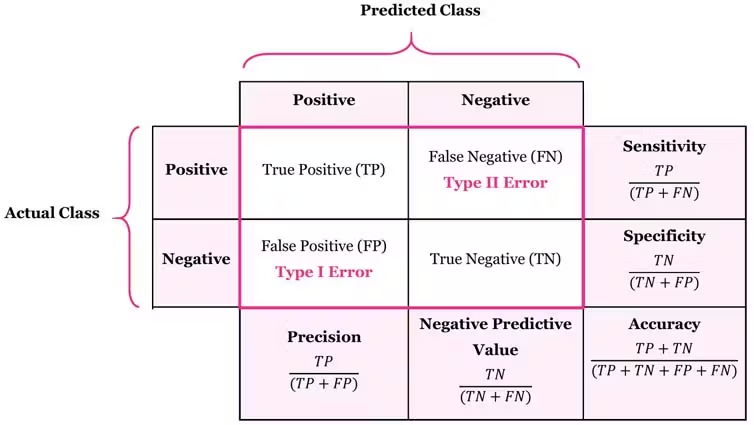

In [ ]:
y_test=[1,1,0,1,1,0,0,0,1,1,0,1,1,0,0,1,1,1,0,1]
y_pred=[1,1,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1,1]

from sklearn.metrics import accuracy_score
print('accuracy= %.1f%%'% (accuracy_score(y_test, y_pred)*100))

from sklearn.metrics import precision_score
print('precision= %.1f%%'% (precision_score(y_test, y_pred)*100))

from sklearn.metrics import recall_score # = sensitivity
print('recall= %.1f%%'% (recall_score(y_test, y_pred)*100))

from sklearn.metrics import f1_score, fbeta_score
print('f1= %.1f%%'% (f1_score(y_test, y_pred)*100))
print('f2= %.1f%%'% (fbeta_score(y_test, y_pred,beta=2)*100))
# F2 Score: Recall(놓치는 것)이 Precision(잘못 잡는 것)의 2배만큼 중요할 때 사용 
# (ex. 의료진단, 사기 탐지, 고객 이탈 등)

from sklearn.metrics import classification_report
print('classification report: \n', classification_report(y_test, y_pred))
# bool형 변수의 경우, report에서 y=1을 기준으로 precision, recall, f1 score 참고

from sklearn.metrics import confusion_matrix
conf_mat = DataFrame(confusion_matrix(y_test, y_pred), 
                     index=['실제(N)', '실제(P)'], columns=['예측(N)', '예측(P)'])
print('confusion matrix: \n', conf_mat)

from sklearn.metrics import roc_curve, auc
fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label=1)
# fpr (false positive rate) = 1 - specificity
# tpr (true positive rate) = recall

plt.plot(fpr,tpr)
print('auc= %.1f' %auc(fpr,tpr)) # 1: 완벽, 0.5: 랜덤, 0: 반대 예측

''' 기타지표들
1. Log loss: 이진분류 평가 지표 (낮을수록 좋음)
 - from sklearn.metrics import log_loss

2. 이익도표: 등급 내림차순으로 향상도가 급격하게 감소할 수록 좋은 모형

3. MCC (매튜상관계수): 불균형한 데이터 모델 성능 평가 (1: 완벽, 0: 랜덤, -1: 반대 예측)
  - from sklearn.metrics import matthews_corrcoef

4. QWK (Quadratic weighted kappa)
  - 다중 클래스 분류 + 순서 관계 있을 때 사용 (1: 완전, 0: 랜덤, 음수: 반대)
  - from sklearn.metrics import cohen_kappa_score
''' 

In [ ]:
# precision-recall 및 ROC curve로 최적점 찾기
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from matplotlib import pyplot as plt
# 앞서 적합한 로지스틱 회귀 모델로 예측값, 예측확률값 가져오기
pred = lr.predict(X_test) 
prob = lr.predict_proba(X_test)[:, 1] # 1이 될 probability thresholds

## 1) precision-recall의 차이가 최소가 되는 지점 찾기
# Precision-recall trade-off
precision, recall, thresholds = precision_recall_curve(y_test, prob)
thresholds = list(thresholds)+[1]
idx = np.argmin(np.abs(precision - recall))
best_threshold = thresholds[idx]

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].set_title("Precision-recall trade-off")
ax[0].plot(thresholds, precision, label='precision')
ax[0].plot(thresholds, recall, label='recall', linestyle='dashed')
ax[0].plot(best_threshold, recall[idx], marker='o', color='red', label="best_threshold")
ax[0].text(0.6, 0.9, "best threshold: {:.3f}".format(best_threshold), color='red')
ax[0].legend()
ax[0].set_xlabel('probability thresholds')
ax[0].set_ylabel('precision & recall')

## 2) TPR - FPR을 최대화하는 확률임곗값 찾기
# ROC curve & best threshold
fpr, tpr, thresholds = roc_curve(y_test, prob)
auc = roc_auc_score(y_test, prob)

## best thresholds(=cut-off value) 찾기
## Youden Index (Youden's J statistic): recall - (1-specificity)의 최대 지점
import numpy as np
J = tpr - fpr
idx= np.argmax(J)
best_threshold = thresholds[idx]
best_tpr = tpr[idx]
best_fpr = fpr[idx]

ax[1].set_title("ROC curve & best threshold")
ax[1].plot(fpr, tpr, label="AUC")
ax[1].plot([0,1], [0,1], linestyle='dashed')
ax[1].plot(best_fpr, best_tpr, marker='o', color='red', label="best_threshold")
ax[1].text(0.1, 0.9, "best thresholds: {:.3f}".format(best_threshold), color='red')
ax[1].text(0.1, 0.8, "AUC: {:.3f}".format(auc), color='red')
ax[1].legend()
ax[1].set_xlabel('FPR')
ax[1].set_ylabel('TPR')
plt.show()

In [ ]:
# Multi-class 분류 평가: classification report & confusion matrix 활용
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

load = load_wine()
X = load['data'][:, :5]
y = load['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

svm = SVC(C=1, kernel='rbf', gamma='auto', probability=True)
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
prob = svm.predict_proba(X_test)[:, 1]
 
print("\n>>> classification_report:\n", classification_report(y_test, pred))
print(">>> confusion_matrix:\n", 
      DataFrame(confusion_matrix(y_test, pred), 
                index=['실제값(0)', '실제값(1)', '실제값(2)'], columns=['예측값(0)', '예측값(1)', '예측값(2)']))

#### 3. 군집모델 평가 지표

In [ ]:
# A. 실제 군집값이 없는 경우
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
functions = [silhouette_score, calinski_harabasz_score, davies_bouldin_score]
titles = ['silhouette', 'calinski', 'davies']
for f , t in zip(functions, titles):
    score = f(X, cluster)
    print(" {}: {:.3f}".format(t, score))

# silhouette: 1(완벽 군집화) ~ -1(실패), DBSCAN 등 밀도 기반에서 높은 점수내는 경향
# calinski and harabasz: 클러스터 내 분산과 클러스터 간 분산 비율 (숫자 높음)
# Davies-Bouldin: 최소값은 0, 낮을수록 군집화 잘됨

# B. 실제 군집값이 있는 경우
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, 
completeness_score, homogeneity_score, v_measure_score, rand_score, mutual_info_score
functions = [adjusted_rand_score, normalized_mutual_info_score, completeness_score, 
             homogeneity_score, v_measure_score, rand_score, mutual_info_score]
titles = ['ARI', 'NMI', 'completeness', 'homogeneity', 'v-measure', 'rand', 'MI']
for f , t in zip(functions, titles):
    score = f(target, cluster)
    print(" {}: {:.3f}".format(t, score))

# ARI: 1(Good) ~ -0.5(Bad), 0이면 무작위 군집
# NMI: 1(실제-예측 완벽 상관관계) ~ 0(독립 관계)
# completeness: 1(Good) ~ 0(Bad), true/pred 순서 변경되면 안됨
# homogeneity: 1(Good) ~ 0(Bad)
# v_measure: 1(Good) ~ 0(Bad), 완전성과 동질성의 조화평균

#### 4. 거리 지표

In [ ]:
# A. 연속형 변수 거리
from scipy.spatial.distance import euclidean, seuclidean, cityblock, minkowski, mahalanobis

#유클리드 거리 (L2 거리)
eu1 = euclidean(NV1, NV2)

#표준화 거리: 해당변수의 표준변차로 척도 변환 후 유클리드 거리 계산
seu1 = seuclidean(NV1, NV2, V)

#맨해튼 거리 (L1 거리)
man1 = cityblock(NV1, NV2)

#민코프스키 거리 (p=1, 맨해튼 / p=2, 유클리드)
min1 = minkowski(NV1, NV2, p=1)
min2 = minkowski(NV1, NV2, p=2)

#마할라노비스 거리: 그룹에 대한 사전 지식 없이는 공분산을 계산할 수 없기에 사용 곤란
mah1 = mahalanobis(NV1, NV2, IV)

In [ ]:
# 범주형 변수 거리
from scipy.spatial.distance import jaccard, cosine
from sklearn.metrics import pairwise_distances

# 자카드 거리 = 1 - 자카드 유사도 (1 (유사) ~ 0 (다름)), Bool 속성 변수에 사용
jac1 = jaccard(doc_1, doc_2) # scipy
jac2 = pairwise_distances(bdf.values, metric='jaccard')[0][1] #sklearn

print("Jaccard distance: {:.3f} = {:.3f}".format(jac1, jac2))
print("Jaccard similarity: {:.3f} = {:.3f}".format(1-jac1, 1-jac2))

# 코사인 거리 = 1 - 코사인 유사도 (1 (유사) ~ -1 (다름)), 일반 범주형 변수에 사용
cos1 = cosine(doc_1, doc_2) # scipy
cos2 = pairwise_distances(fdf.values, metric='cosine')[0][1] #sklearn

print("cosine distance: {:.3f} = {:.3f}".format(cos1, cos2))
print("cosine similarity: {:.3f} = {:.3f}".format(1-cos1, 1-cos2))

### **Time Series**

#### 1. 시계열 데이터 처리

In [ ]:
import datetime as dt
import time

# 1-1) 날짜 데이터로 타입 변경하기 - object: datetime
ts['날짜'] = ts['날짜'].astype('datetime64[ns]')
  # pandas는 날짜/시간 데이터 형식으로 datetime64[ns] (나노초 단위)만 지원 

# 1-2) 날짜 데이터로 타입 변경하기 - string <-> datetime
string = "2018-09-13 22:39:04"
datetime = dt.datetime.strptime(string, '%Y-%m-%d %H:%M:%S')
  # string에서 나타내는 년월일 정보와 대응하도록 format을 적어줘야 해당 날짜로 인식 가능
string2 = datetime.strftime('%Y-%m-%d %H:%M:%S') 

# 1-3) 날짜 데이터로 타입 변경하기 - timestamp <-> datetime
timestamp = 2551780740
datetime = dt.datetime.fromtimestamp(timestamp) # 로컬 기준

from datetime import timezone
utcdatetime = datetime.fromtimestamp(timestamp, timezone.utc) # utc 기준

timestamp2 = time.mktime(datetime.timetuple())

# 2-1) 날짜 데이터 생성하기 - dt.datetime
date1 = dt.datetime(2023, 3, 20, 16, 0, 0) 
date2 = dt.datetime.now()
date_only = dt.date(2019,1,1)
time_only = dt.time(10, 0, 5)

# 2-2) 날짜 데이터 생성하기 - pd.date_range, pd.period_range
# freq={'Y or YE(년)', 'M(월)', 'D(일)', 'min(분)' 'S(초)', 'Q(분기)', 'W(주)'}
date_list1 = pd.date_range('2016-01-01', periods=3, freq='YE-MAY')
date_list3 = pd.date_range('2016-01-01', '2016-01-02', freq='30min') 
date_list4 = pd.period_range('2012-01-01', freq='Y', periods=2)
date_list5 = pd.period_range('2012-01-01', freq='Q', periods=3)

# 3) 날짜 데이터의 형태, 값 변경하기
date3 = dt.datetime(2023, 3, 20, 0, 1, 10)
date3_c1 = date3.strftime("%Y-%m-%d") #네자리 년도, 월, 일
date3_c2 = date3.strftime("%y년 %m-%d %H:%M:%S") #두자리 년도, 월, 일, 시간, 분
date4 = date3.replace(year = 2022, minute=2)
datetime = dt.datetime.combine(date_only, time_only) 

# 4) 날짜 데이터 간 연산하기
weeks1 = dt.timedelta(weeks = 1)
print("오늘로부터 1주 전: ", today - weeks1)

# 5) 인덱스 추출
ts['년'] = ts['날짜'].dt.year # month, day, weekday(0~6), day_name(영어 요일명)

#### 2-1. 일반 EDA

In [ ]:
sns.histplot(x='전일대비증감수', data=ts_head, ax=axes[0])
  # 히스토그램 (보통, 변화에 관심이 많으므로 차분한 시계열로 EDA 진행)
sns.scatterplot(x='날짜', y='전일대비증감수', data=ts_head, ax=axes[1])  # 산점도
print(ts_head.describe().T)  # 요약 통계량

#### 2-2-1. 시계열 특화 EDA: 정상성 확인
- Stationarity: 시간이 지나도 평균/분산 일정, 추세나/계절성 없음
- 검정방법 총 3가지: ADF, KPSS, ACF 그래프
- 정상화 방법
  1) 평균 변화: **차분**
  2) 분산 변화: **변환** (로그, 제곱근, Box-cox, Yeo-Johnson 등)

In [ ]:
# [검정 1] ADF (H0: 단위근을 포함한다 (비정상))
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_head, regression='c', autolag='AIC')
  # c: 상수항만 (기본값), ct: c + 선형 추세, ctt: ct + 이차 추세
print("ADF Statistics: {:.3f}, p-value: {:.3f}".format(result[0], result[1]))

# [검정 2] KPSS (H0: 정상시계열과 차이가 없다 (정상))
from statsmodels.tsa.stattools import kpss
result = kpss(ts_head, regression='c', nlags='auto')
print("KPSS Statistics: {:.3f}, p-value: {:.3f}".format(result[0], result[1]))

# [검정 3] ACF 그래프 (시차 증가할수록 빠르게 0으로 감소 (비정상성: 느리게 감소))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts_head)

#### 2-2-2. 시계열 특화 EDA: 자기상관 확인
- autocorrelation: 서로 다른 시점 데이터 간의 선형적 상관관계
- 검정방법
  1) ACF/PACF: y값이 임계영역에서 벗어나면 자기상관성 존재
  2) Ljung-box: H0 = 자기상관이 없다, H0 채택하면 자기상관성 없음
  3) Durbin-watson (회귀 잔차분석): 2 - 자기상관 없음, 0 - 양, 4 - 음

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# [검정 1] ACF/PACF 그래프 (y값이 임계영역에서 벗어나면 자기상관성 존재)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1,2, figsize=(10,5))
plot_acf(ts_head, ax=ax[0])
plot_pacf(ts_head, ax=ax[1])

# [검정 2] Ljung-box test (H0: 데이터가 일련의 상관관계를 나타내지 않는다.)
from statsmodels.stats.diagnostic import acorr_ljungbox
result = acorr_ljungbox(ts_head, return_df=True, auto_lag=True).head(3)

# [검정 3] Durbin-watson (2 - 자기상관 없음, 0 - 양, 4 - 음 / 회귀 잔차분석에도 사용)
from statsmodels.stats.stattools import durbin_watson
result = durbin_watson(ts_head)

#### 2-2-3. 시계열 특화 EDA: 시계열 분해
- Decomposition: 추세, 계절성, 순환, 불규칙 변동으로 분해하여 데이터 파악 및 예측
1) 이동평균법: 계절/불규칙 변동 제거, 주요 파라미터 (window, min_periods)
2) 지수평활법: 불규칙 변동 제거, 주요 파라미터 (alpha = 지수평활계수)
3) STL 분해: 계절/추세/잔차로 분해 가능

In [ ]:
# 1) 이동평균법: 계절/불규칙 변동 제거 (주요 파라미터: window, min_periods)
rw10 = ts_head.rolling(window=10).mean().dropna()

# 2) 지수평활법: 불규칙변동 제거 
ewm03 = ts_head.ewm(alpha=0.3).mean()  # alpha가 높으면 근접 높은 가중치
ewm05 = ts_head.ewm(alpha=0.5).mean()

# 3) STL 분해: 계절/추세/잔차로 분해
from statsmodels.tsa.seasonal import STL
fitted = STL(ts_head, seasonal=7, trend=9).fit()
resid = fitted.resid # 잔차
seasonal = fitted.seasonal # 추정된 계절 요소
trend = fitted.trend # 추정된 트렌드 요소

#### 3. 데이터 전처리

In [ ]:
# A. 시계열 빈도 변경 (업/다운샘플링)
# rule = 'YE(년)', 'ME(월)', 'D(일)', 'min(분)' 'S(초)', 'QE(분기)', 'W(주)'
print(ts.resample(rule='QE').asfreq()) # 해당 기간의 대표 날짜의 데이터를 반환
print(ts.resample(rule='QE').sum())
print(ts.resample(rule='QE').mean())

# B. 결측치 처리
ffill = ts_na.ffill() # 1. Forward fill (계산 안 복잡, 실시간 데이터 쉽게 적용)
bfill = ts_na.bfill() # 2. Backward fill (사전관찰이므로 특수한 경우에만 사용)

# 3. Moving average
ma = ts_na.rolling(window=3, min_periods=1, center=True).mean()  # 결측치 포함, 앞뒤 1개 데이터
ma2 = ts_na.rolling(window=3, min_periods=1).mean() # 결측치 포함, 과거 2개 데이터
ma3 = ts_na.shift(1).rolling(window=3, min_periods=1).mean() # 결측치 미포함, 과거 3개 데이터
ma_filled = ts_na.fillna(ma3.round(0))

# 4. 보간법 
linear = ts_na.interpolate(method='linear')
  # method = nearest, zero, quadratic (poly=2와 동일), cubic (poly=3과 동일)
  #          (order 필요) spline, polynomial

sqrd_e = sum((ts - data)['전일대비증감수']**2)  # squared error로 결측치 처리 효과 검증

# C. 차분 및 변환
diff1 = ts_head.diff(periods=1).dropna()
diff2 = ts_head.diff(periods=2).dropna() # 2차 차분 아니고, 2시점 전과의 차이
diff2_true = ts.diff(1).diff(1) # 진정한 2차 차분

# 로그변환
log = np.log(ts_head)
# 박스콕스 변환
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
rescaled = pt.fit_transform(ts_head)
boxcox = DataFrame(rescaled, index=ts_head.index, columns=ts_head.columns)

# 변환 후 차분
log = log.diff(1).dropna()
boxcox = boxcox.diff(1).dropna()

#### 4. ARIMA 모델 적합
- **ARIMA 모형 적합 순서**
  1) 정상성 및 계절성 확인
  2) 정상성 작업: 차분 및 변환
  3) p/q 찾기: p는 PACF 절단점, q는 ACF 절단점
  4) 모델 검증: 잔차의 자기상관성과 정상성 판단
- SARIMA (Seasonal ARIMA): ARIMA(p,d,q) + (P,D,Q)m (m: 계절 주기당 시간 단계 수)

In [ ]:
# 3-1. p/q 찾기 by ACF/PACF 그래프
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1,2, figsize=(10,5))
plot_acf(boxcox, ax=ax[0])  # boxcox 변환 및 차분을 통해 정상화한 시계열 데이터 
plot_pacf(boxcox, ax=ax[1])

# 3-2. p/q 찾기 by auto-arima
from pmdarima import auto_arima
auto_arima(ts_head, start_p=1, start_q=1, max_p=5, max_q=5, start_P=0, start_Q=0, 
           max_P=5, max_Q=5, m=7, seasonal=True, trace=False, 
           error_action='warn', suppress_warnings=True)

# 4. 모델 예측 및 잔차 분석
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
ts_head = ts_head.asfreq('D') # frequency 명시적 설정 필요
model = ARIMA(ts_head, order=(p, d, q), seasonal_order=(P, D, Q, s)) 
  # ARIMA에서 seasonal_order를 입력하면 SARIMAX와 동일한 결과를 얻음
fitted = model.fit()
resid = fitted.resid

# pred1과 pred2는 동일
pred1 = fitted.forecast(31)
pred2 = fitted.predict(start=ts_tail.index[0], end=ts_tail.index[-1]) #시작/종료날짜로 예측

print(fitted.summary()) 
# 잔차의 정규성 확인: Jarque-Bera 검정을 통해 귀무가설을 채택하면, 정규성을 갖는다.
# 잔차의 자기상관 확인: Ljung-Box 검정을 통해 귀무가설을 채택하면, 자기상관이 없다.

# 4-1. 모델별 예측 성능 비교 by r2_score, MAPE
from sklearn.metrics import r2_score
import numpy as np
def MAPE(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred)/y_true))*100
    return mape

titles = ["box-jenkins", "auto_arima", "for loop"]
ts_tail1d = ts_tail.values.ravel()
preds = [pred1.values, pred3.values, pred5.values]
for title, pred in zip(titles, preds):
    r2 = r2_score(ts_tail1d, pred)
    mape = MAPE(ts_tail1d, pred)
    print("{}:  R2 {:.3f}, MAPE {:.3f}".format(title, r2, mape))

### **시각화**

In [ ]:
# DataFrame 내 수치형 변수만 boxplot 여러 개를 가장 빠르게 그리는 방법
import matplotlib.pyplot as plt
df.plot (kind='box', subplots=True)

In [ ]:
# 그래프 영역 구분 + 산점도 (seaborn)
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].set_title("imbalanced")
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=imb_df, ax=ax[0], alpha=0.5, style='target', markers=['s', '>'])

In [15]:
# 그래프 파라미터 지정
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 12

# 격자 표기
ax.grid()

# 복수 그래프 사용 시, 특정 그래프에 값 2개 표현하기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax11 = ax1.twinx()
ax1.plot(result['loss'], color='red', label='loss')
ax11.plot(result['accuracy'], color='blue', label='accuracy')

In [ ]:
# KDEplot (Kernel Density Estimation) : 변수의 분포를 그려줌 (ex. 정규분포 확인에 용이)
sns.kdeplot(x, alpha=0.5, legend=True, fill=True, color='r')

# 회귀분석 그래프 (산점도 + y_pred 신뢰구간)
sns.regplot(x=X, y=Y, ax=ax)

# QQ plot (잔차 정규성 분석)
from scipy.stats import probplot
probplot(resid, plot=ax[1])

# RGB 데이터 행렬 --> 이미지 표현
plt.imshow(x_test2[j].reshape(-1,image_size))  
# image_size = 28 / x_test2[j].shape = (1,784) --> 28X28픽셀 이미지 표기

In [ ]:
# 데이터프레임 행렬전환, 행마다 마커 다르게, iloc까지
for i, marker in enumerate(['s', 'o', 'x', '+', '.', '*']):
    coeffs.T.iloc[:, i].plot(ax = ax, marker=marker, ms=10)

# 데이터 라벨 붙이기 (x,y,s) --> s = name이면 라벨로 행(인덱스) 표기
plt.text(reduced_data.loc[i, 'dim1'], reduced_data.loc[i, 'dim2'], name)

### **Etc**

In [5]:
# 한글글꼴 포함
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 실제 경로로 대체
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_name 

In [ ]:
# 특정 열 추출하여 새로운 set 만들기
df = df.filter(['mean radius', 'mean texture', 'mean area', 'target'])
df = df.drop('y', axis=1)

# 두 DataFrame을 하나로 합치기
df3 = pd.concat ([df1, df2], axis=1)

# 두 Array 합치기 (행/렬)
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))

# DataFrame에서 A열을 조건으로 B열을 추출할 경우
data1 = data[data['target']=='setosa']['sepallength']
plus = table.query("sign==1")['rank']

# Apply: DataFrame 특정열의 조건을 걸어 신규열 추가
df['B'] = df['A'].apply(lambda x: len(x))

# DataFrame에서 특정열에 조건을 거는 경우
df = df.query("col1!=0")
rule[(rule['len_con']==1) & (rule['lift']>=1.2)])

# DataFrame에서 인덱스/컬럼명 설정
table = DataFrame([[10, 2], [3, 5]], index=['A', 'B'], columns=['승', '패'])
table = DataFrame({"성별":['남자', '여자'], '안경O':[10,30], '안경X':[40, 20]}).set_index('성별')

# DataFrame 행 기준 앞/뒤 추출
down_head = down.head(300)
down_tail = down.tail(14)

# DataFrame에서 데이터 추출  
table.values[0]   # 1행 데이터 (인덱스, 컬럼 제외)
table.columns[0]  # 1열 컬럼명
table.index[0]    # 1행 인덱스명

# 데이터 컬럼의 모든 pair 추출 by combination
from itertools import combinations
col_comp= list(combinations(table.columns, 2))
  # 결과: [('가수1', '가수2'), ('가수1', '가수3'), ('가수2', '가수3')]

# 리스트 조합 및 저장
combis = list(itertools.product(p, d, q, P, D, Q, m))

In [ ]:
# 갯수 세기 (분포)
from collections import Counter
print("original data의 class 분포: ", Counter(df['target']))
   # original data의 class 분포:  Counter({1.0: 357, 0.0: 212})

# table내 수치 전체 합계
ttl = table.sum().sum()

# rank 활용 (예시: rank 겹치면 평균 순위 (ex. 1.5등))
table['rank'] = table['abs_d'].rank(method='average')

# @: 데이터 외부 변수를 활용할 때
W1 = table.query("M==@M1")['rank'].sum()

# cumsum: 누적값 계산 및 표기
e_value['누적기여율'] = e_value['기여율'].cumsum()

# dot: 행과 열 곱
result = np.dot(A, B) 

In [ ]:
# 특정 type의 변수만 통계 보기
x.describe(include='object')

# 자료 type 변경
x['col'] = x['col'].astype('category')  # DataFrame 컬럼 내
data1 = list(map(lambda x: float(x), data1))  # list 전체

# 컬럼 내 자료 변환
x['col'] = x['col'].replace({'A':0, 'B':1, 'C':2, 'D':3})
x['col'] = x['col'].map({'A':0, 'B':1, 'C':2, 'D':3})
  # replace: 데이터프레임이나 시리즈, 미매핑시 기존 값 유지, 정규 표현식 사용 가능 (regex=True)
  # map: 시리즈나 인덱스, 미매핑시 NaN, 정규 표현식 사용 불가

# 원하는 변수만 변환 (map & lambda 조합)
data2 = list(map(lambda x: 0 if x == 'a' else 1, data))

In [ ]:
# 랜덤변수 생성
np.random.randint(0,10,3)  # 0~10사이 정수로 3개 난수 생성
np.random.rand(2,2)  # 0~1사이 실수를 2X2 배열로 생성

# 정규성 만족하는 랜덤데이터 생성하기
from scipy.stats import norm
data = norm.rvs(size=100, random_state=0)

# 랜덤 회귀 변수 생성
from sklearn.datasets import make_regression
X, y =  make_regression(n_samples=30, n_features=1, random_state=0, noise=4.0, bias=100.0)

# 표준정규분포로 치환
from scipy.stats import zscore
zdata = zscore(data)

In [ ]:
# 콤비네이션 함수 정리
from numpy import math
fac = math.factorial
def combi(a.b):  # combination 함수 정리
    result = fac(a)/fac(b)/fac(a-b)
    return result

In [ ]:
# 표 만들기: A 값들을 열, B 값들을 행으로 하여 Y를 값으로 표기 
table = crosstab(data['before'], data['after']) # 전후 2X2 행렬
pd.crosstab(data['A'], data['B'], values=data['Y'], aggfunc=list)
pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c'])

# ravel: 다차원 배열을 1차원 배열로 평탄화 (cf. ravel: 더 꼬이게 만들다)
array = np.array([[1, 2, 3], [4, 5, 6]])
flattened_C = np.ravel(array, order='C')  # [1 2 3 4 5 6]
flattened_F = np.ravel(array, order='F')  # [1 4 2 5 3 6]

In [ ]:
# 시간 간격 활용 (예시. 10년 후)
from datetime import datetime
now = datetime.now()
before = now - relativedelta(years=10)

now_day = now.strftime("%Y-%m-%d")
before_day = before.strftime("%Y-%m-%d")